<img src="airbnb.png">

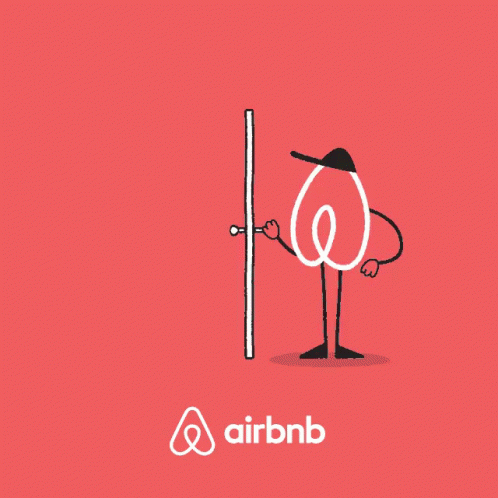

# Lets get started😁

## Problem Statements

### 🏙️ **Neighborhood & Location Analysis**

1. **What are the most popular neighborhoods for Airbnb rentals in NYC?**
   *(based on listing count, reviews, availability)*

2. **How do average prices and availability vary by neighborhood and neighborhood group (borough)?**

3. **Which neighborhoods have the highest and lowest occupancy potential (based on availability & reviews)?**

4. **What are the top listing locations for travelers in terms of price, convenience, and availability?**

---

### 📈 **Market Trends & Time Analysis**

5. **How has the Airbnb market changed over time in terms of number of listings, price trends, and reviews?**

6. **What are the busiest months for Airbnb in NYC (seasonal trends)?**

7. **Are certain boroughs showing increasing or decreasing trends in listing counts or popularity?**

---

### 🛏️ **Property Type & Room Type Analysis**

8. **Which room types (Entire home, Private room, Shared room) are most common in each borough?**

9. **Are certain property/room types more expensive or popular than others?**

10. **Which room types are most reviewed in each neighborhood group per month?**

---

### 💰 **Price & Review Correlation**

11. **Which features (e.g., room type, availability, location, reviews) are correlated with Airbnb prices?**

---

### 🧳 **Booking Behavior & Stay Duration**

12. **How do minimum night stays vary by neighborhood and room type?**

13. **Which neighborhoods attract longer or shorter stays on average?**

---

### 💬 **Review Insights**

14. **What’s the total number of reviews per neighborhood group?**

15. **Which listings have the maximum number of reviews by neighborhood?**

16. **How does number of reviews correlate with availability and price?**

---

### 🌟 **Bonus Advanced Questions**

17. **Which hosts own the most properties — are they professional operators?**

18. **Can we recommend top 5 listings for a traveler based on reviews, price, and availability?**

---

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Load the Dataset

In [2]:
df = pd.read_csv("Airbnb NYC 2019 dataset.csv")
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

## About the Dataset – Airbnb NYC Bookings (2019)

This dataset comprises approximately **49,000 Airbnb listings** from **New York City**, collected in 2019. It includes **16 diverse columns** spanning both **categorical** and **numerical** features — offering detailed insights into each listing's characteristics such as price, availability, room type, and user engagement through reviews.

The richness of the dataset makes it highly suitable for exploring:

* **Market trends and seasonal patterns**
* **Geographic and pricing distribution**
* **User preferences and booking behavior**

By analyzing this data, we can uncover meaningful patterns in Airbnb usage across different NYC boroughs and gain actionable insights into the dynamics of short-term rentals in one of the world’s most visited cities.


## Understanding the given columns

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# renaming the column name as it is too long
df = df.rename(columns={'id':'listing_id', 'name':'listing_name', 'calculated_host_listings_count':'host_listings_count'})
df

listing_id                                       listing_name  \
0            2539                 Clean & quiet apt home by the park   
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
3            3831                    Cozy Entire Floor of Brownstone   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
...           ...                                                ...   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48893    36485609               43rd St. Time Square-cozy single bed   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

        host_id      host_name neighbourhood_group       neighbourhood  \
0          2787           John            Brooklyn          Kensington   
1          2845       Jennifer           Manhattan             Midtown   
2          4632      Elisabeth           Manhattan              Harlem   
3          4869    LisaRoxanne            Brooklyn        Clinton Hill   
4          7192          Laura           Manhattan         East Harlem   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
0      40.64749  -73.97237     Private room    149               1   
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
3      40.68514  -73.95976  Entire home/apt     89               1   
4      40.79851  -73.94399  Entire home/apt     80              10   
...         ...        ...              ...    ...             ...   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48893  40.75751  -73.99112      Shared room     55               1   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  host_listings_count  \
0                      9  2018-10-19               0.21                    6   
1                     45  2019-05-21               0.38                    2   
2                      0         NaN                NaN                    1   
3                    270  2019-07-05               4.64                    1   
4                      9  2018-11-19               0.10                    1   
...                  ...         ...                ...                  ...   
48890                  0         NaN                NaN                    2   
48891                  0         NaN                NaN                    2   
48892                  0         NaN                NaN                    1   
48893                  0         NaN                NaN                    6   
48894                  0         NaN                NaN                    1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

- 🆔 **`listing_id`**: Unique identifier assigned to each listing in the dataset.

- 🏠 **`listing_name`**: Title of the Airbnb listing as shown on the platform.

- 🧑‍💼 **`host_id`**: Unique identifier for the host of the listing.

- 👤 **`host_name`**: Name of the host as displayed publicly.

- 🌆 **`neighbourhood_group`**: NYC borough where the listing is located (e.g., Manhattan, Brooklyn).

- 🏘️ **`neighbourhood`**: Specific neighborhood or local area within the borough.

- 📍 **`latitude`**: Geographic latitude coordinate of the listing.

- 📍 **`longitude`**: Geographic longitude coordinate of the listing.

- 🛏️ **`room_type`**: Type of accommodation offered (e.g., Entire home, Private room, Shared room).

- 💵 **`price`**: Nightly rental price in USD.

- 📅 **`minimum_nights`**: Minimum number of nights required per booking.

- ✍️ **`number_of_reviews`**: Total number of reviews received by the listing.

- 🗓️ **`reviews_per_month`**: Average number of reviews the listing receives each month.

- 🧾 **`host_listings_count`**: Total number of listings owned by the host.

- 📆 **`availability_365`**: Number of days in a year that the listing is available for booking.


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  number_of_reviews    48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

So we have null values in name, host_name, last_review and reviews_per_month columns

In [7]:
df.dtypes

listing_id               int64
listing_name            object
host_id                  int64
host_name               object
neighbourhood_group     object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
host_listings_count      int64
availability_365         int64
dtype: object

So, host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.

While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables

## Summary Statistics

In [8]:
df.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       host_listings_count  availability_365  
count         48895.000000      48895.000000  
mean              7.143982        112.781327  
std              32.952519        131.622289  
min               1.000000          0.000000  
25%               1.000000          0.000000  
50%               1.000000         45.000000  
75%               2.000000        227.000000  
max             327.000000        365.000000

🌍 **latitude & longitude**
- Values are valid (NYC’s lat-long range: ~40.5 to 40.9, -74.25 to -73.70)

💰 **price**
- Mean price: $152.72

- Max price: $10,000 → Likely an outlier 😬

📅 **minimum_nights**
- Mean: ~7 nights

- (but max = 1250) → this is very high! -> This can be an outlier

✍️ **number_of_reviews**
- Mean: ~23 reviews per listing

- Some listings have 0 reviews (new or inactive), and some have up to 629 reviews → high engagement

## Missing Values & Duplicates

In [9]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


In [10]:
df.isna().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

So we have missing values in **name, host_name, last_review** and **reviews_per_month** columns

In [11]:
df['listing_name'].fillna('unknown',inplace=True)
df['host_name'].fillna('unknown',inplace=True)

In [12]:
df.isna().sum()

listing_id                 0
listing_name               0
host_id                    0
host_name                  0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

For **reviews_per_month** column, listings can have 0 reviews per month so best to fill it with 0.

In [13]:
df['reviews_per_month'].fillna(0, inplace=True)

In [14]:
# the null values are replaced by 0 value
df['reviews_per_month'].isnull().sum()

0

In [15]:
df.sample(5)

listing_id                                      listing_name  \
26017    20763209                            Clean Chinatown Studio   
41370    32222783    SHOOTS ONLY  Industrial Dumbo Warehouse Studio   
11682     9093219                                    Serenity Space   
48782    36425863        Lovely Privet Bedroom with Privet Restroom   
27795    21799111  Charming and snug 1 bd in West Village near soho   

         host_id host_name neighbourhood_group    neighbourhood  latitude  \
26017   10388662   Frances           Manhattan        Chinatown  40.71515   
41370  241765415   Michael            Brooklyn     Vinegar Hill  40.70046   
11682   47411697     Marie           Manhattan           Harlem  40.81185   
48782   83554966     Rusaa           Manhattan  Upper East Side  40.78099   
27795   17692768  Isabella           Manhattan     West Village  40.73226   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
26017  -73.99863  Entire home/apt    145               4                 13   
41370  -73.98389  Entire home/apt    240               1                  1   
11682  -73.94579     Private room     90               2                 67   
48782  -73.95366     Private room    129               1                  1   
27795  -74.00184  Entire home/apt    175               6                 11   

      last_review  reviews_per_month  host_listings_count  availability_365  
26017  2019-06-10               0.63                    1                86  
41370  2019-03-14               0.25                    1                89  
11682  2019-06-22               1.54                    1               211  
48782  2019-07-07               1.00                    1               147  
27795  2018-10-08               0.62                    1                 0

In [16]:
# there are some listings where the listing names and host names are equal
df[df['listing_name']==df['host_name']].head()

listing_id    listing_name    host_id       host_name  \
9473      7264659         Olivier    6994503         Olivier   
10682     8212051           Monty   43302952           Monty   
16422    13186374            Sean   35143476            Sean   
23996    19348168             Cyn   74033595             Cyn   
24152    19456810  Hillside Hotel  134184451  Hillside Hotel   

      neighbourhood_group       neighbourhood  latitude  longitude  \
9473            Manhattan     Upper West Side  40.78931  -73.97520   
10682            Brooklyn       East Flatbush  40.66383  -73.92706   
16422            Brooklyn     Windsor Terrace  40.65182  -73.98043   
23996            Brooklyn  Bedford-Stuyvesant  40.67850  -73.91478   
24152              Queens           Briarwood  40.70454  -73.81549   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9473   Entire home/apt    200               5                 12  2018-01-30   
10682      Shared room     95               2                  7  2015-10-30   
16422  Entire home/apt    400               7                  0         NaN   
23996     Private room     75               2                  1  2018-09-10   
24152     Private room     93               1                  2  2017-07-23   

       reviews_per_month  host_listings_count  availability_365  
9473                0.25                    1                25  
10682               0.15                    1               238  
16422               0.00                    1                 0  
23996               0.10                    1                 0  
24152               0.08                   18                90

## Outlier Detection

In [17]:
df.describe()

listing_id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       host_listings_count  availability_365  
count         48895.000000      48895.000000  
mean              7.143982        112.781327  
std              32.952519        131.622289  
min               1.000000          0.000000  
25%               1.000000          0.000000  
50%               1.000000         45.000000  
75%               2.000000        227.000000  
max             327.000000        365.000000

### 💰 price
Max = 10,000

Mean = 152.7, 75th percentile = 175, Median = 106

🔥 Evidence of outliers:

Listings priced > $500–1000 are extremely rare and unrealistic

A few luxury or test listings with inflated prices

### 📅 minimum_nights
Max = 1250, but median = 3, 75th percentile = 5

❗ Evidence:

99% of listings require under 30 nights

minimum_nights > 365 = not practical (e.g., test data, long-term stays)

### 🧾 host_listings_count
Max = 327, Mean = 7

👀 Most hosts own 1–2 listings; 327 suggests a commercial host

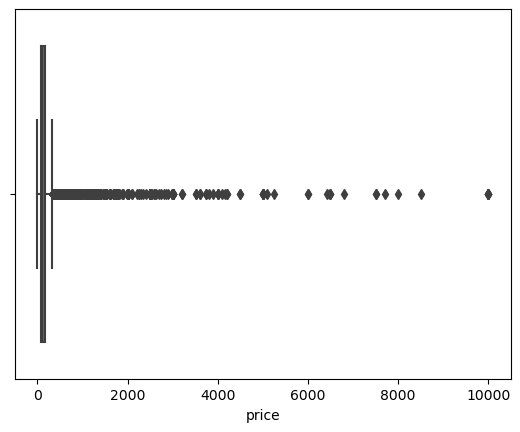

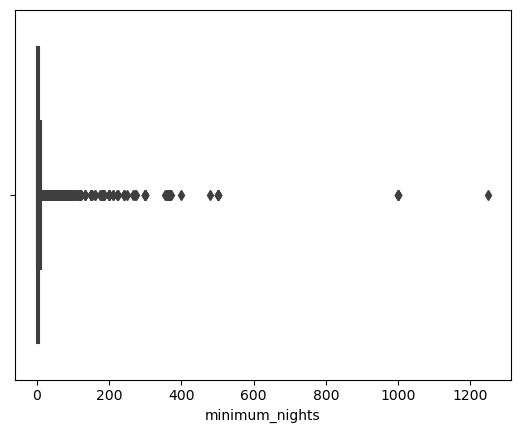

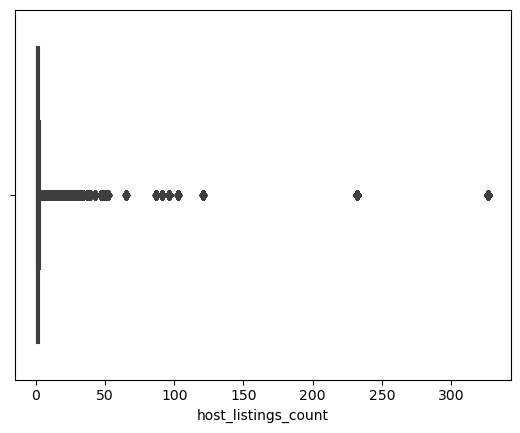

In [18]:
cols = ['price', 'minimum_nights', 'host_listings_count']
for col in cols:
    sns.boxplot(x=df[col])
    plt.show()

**price, minimum_nights, number_of_reviews,** and **host_listings_count** have outliers

## Removing Outliers using IQR method

In [19]:
def remove_outliers(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        LB = Q1 - (1.5 * IQR)
        UB = Q3 + (1.5 * IQR)
        df_clean = df_clean[(df_clean[col] >= LB) & (df_clean[col] <= UB)]
    return df_clean

In [20]:
cols = ['price', 'minimum_nights', 'number_of_reviews', 'host_listings_count']

df_cleaned = remove_outliers(df, cols)

# Check shapes
print("Original dataset:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original dataset: (48895, 16)
After outlier removal: (32004, 16)


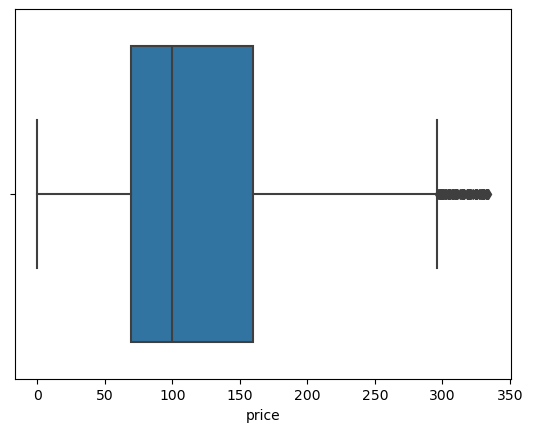

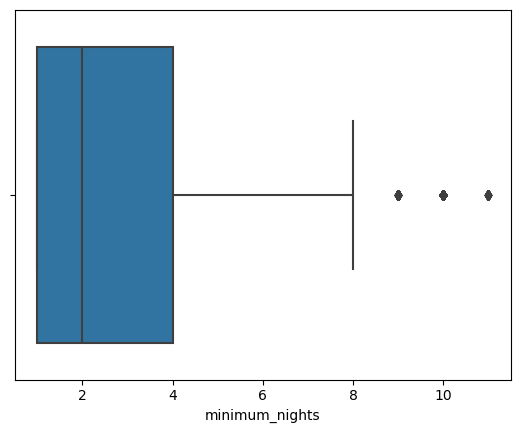

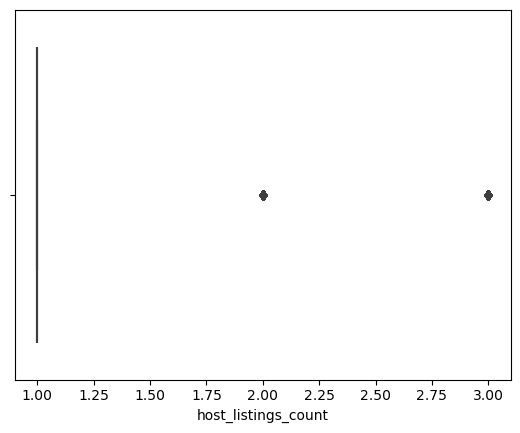

In [21]:
cols = ['price', 'minimum_nights', 'host_listings_count']
for col in cols:
    sns.boxplot(x=df_cleaned[col])
    plt.show()

# 📊Data Analysis

## Distribution of Price Range

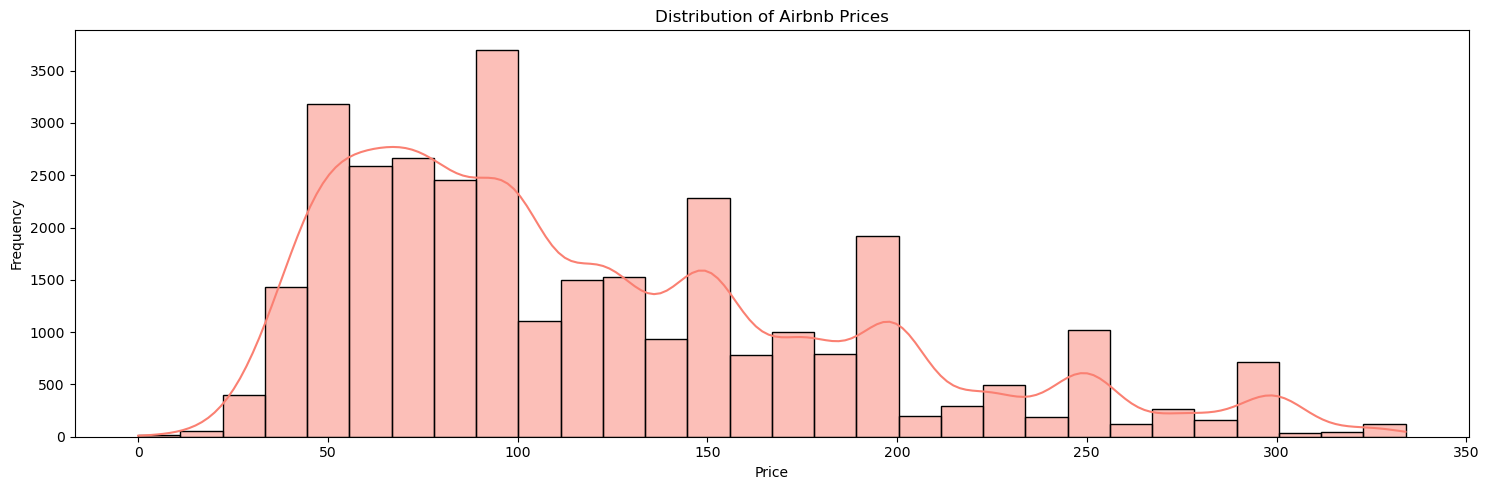

In [22]:
plt.figure(figsize=(15,5))
sns.histplot(
            data=df_cleaned,
            x = 'price',
            bins=30,
            kde=True,
            color='salmon'
)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Observations
- The curve is heavily skewed to the right i.e. Most listings are on the lower price side and a few very expensive listings pull the tail far right.
- Prices charged by Airbnb ranges from \\$20 to \\$330.
- Most of the prices are falling between \\$50 to \\$150.
- The number of listings significantly drops after \\$150 – \\$200.
- Few luxury listings go up to ~\\$300+, but they're rare.
- This suggests affordability is a key factor in listing popularity.

## Total Listing counts for each neighbourhood group

In [23]:
total_listings = df_cleaned['neighbourhood_group'].value_counts()
total_listings

neighbourhood_group
Brooklyn         14131
Manhattan        13209
Queens            3670
Bronx              754
Staten Island      240
Name: count, dtype: int64

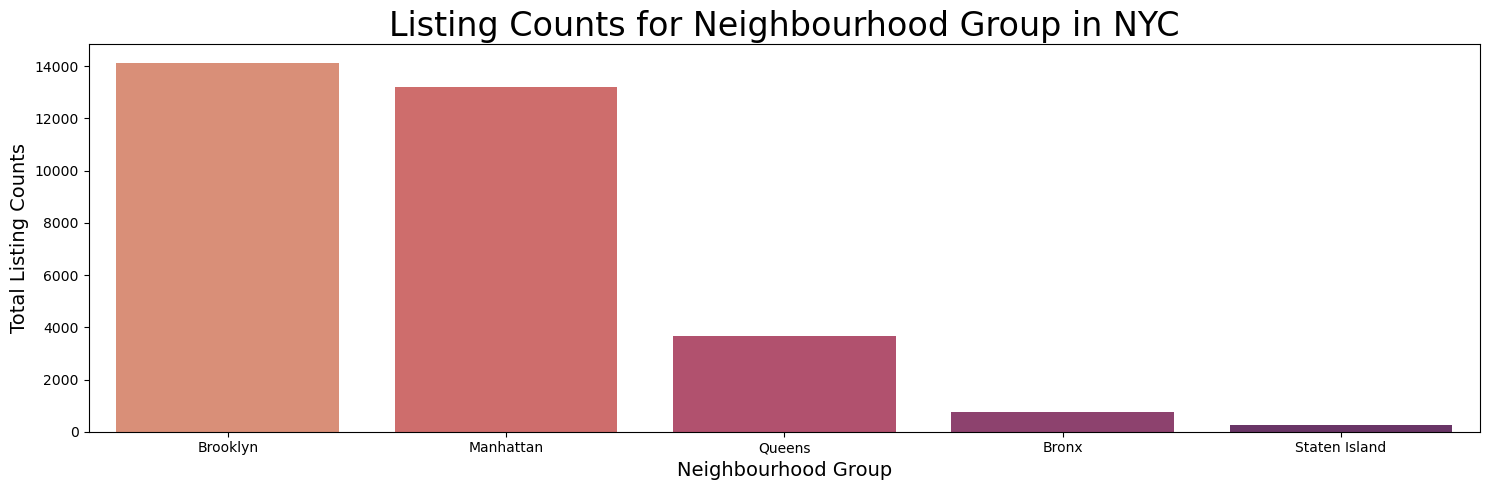

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=total_listings.index, y= total_listings.values, palette='flare')
plt.title("Listing Counts for Neighbourhood Group in NYC", fontsize=24)
plt.xlabel("Neighbourhood Group", fontsize=14)
plt.ylabel("Total Listing Counts", fontsize=14)
plt.tight_layout()
plt.show()

### Observations

- Brookyln shows highest number of listings (~14,000) — indicating a high density of Airbnb activity
- Manhattan Comes Second ~13,000 listings — slightly behind Brooklyn
- Queens and Bronx have fewer listings with 3670 and 754 respectively. Likely due to lower tourist activity and accessibility challenges

In [25]:
df_cleaned.to_csv("Airbnb dataset.csv")

## 1. Most popular neighborhoods for Airbnb rentals in NYC? (based on listing count, reviews, availability)

In [26]:
# Based on Listing count
listing_counts = df_cleaned.groupby('neighbourhood')['listing_id'].count().sort_values(ascending=False).reset_index().rename(columns={"listing_id": "listing_count"})
listing_counts

neighbourhood  listing_count
0                  Williamsburg           2974
1            Bedford-Stuyvesant           2459
2                        Harlem           1864
3                      Bushwick           1761
4                  East Village           1324
..                          ...            ...
212                 Eltingville              1
213                 Castle Hill              1
214                 Willowbrook              1
215                    New Dorp              1
216  Bay Terrace, Staten Island              1

[217 rows x 2 columns]

In [27]:
top_10 = listing_counts.head(10)
top_10

neighbourhood  listing_count
0        Williamsburg           2974
1  Bedford-Stuyvesant           2459
2              Harlem           1864
3            Bushwick           1761
4        East Village           1324
5     Upper West Side           1204
6       Crown Heights           1173
7     Upper East Side           1121
8      Hell's Kitchen           1018
9          Greenpoint            779

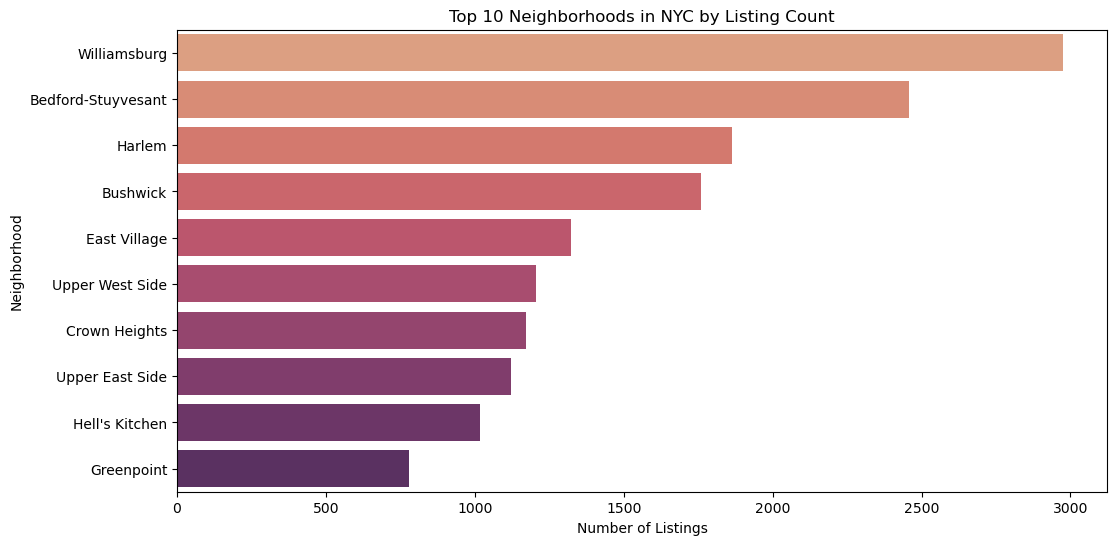

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='listing_count', y='neighbourhood', palette='flare')
plt.title('Top 10 Neighborhoods in NYC by Listing Count')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

### Observations

- 🏆 Williamsburg tops the chart with nearly 3,000 listings — it's a cultural hotspot in Brooklyn known for its nightlife and arts scene.

- Bedford-Stuyvesant, Harlem, and Bushwick also show strong presence, suggesting high Airbnb activity in both Brooklyn and northern Manhattan.

- Neighborhoods like East Village, Upper West Side, and Crown Heights represent high tourist interest or host availability in centrally located residential areas.

In [29]:
# Other ways to showcase using aggregate function
# Group by neighborhood
neighborhood_stats = df_cleaned.groupby('neighbourhood').agg(
    total_listings=('listing_id', 'count'),
    total_reviews=('number_of_reviews', 'sum'),
    avg_availability=('availability_365', 'mean')
).sort_values(by='total_listings', ascending=False) #sort by total_listings or total_reviews or avg_availability

# View top 10 neighborhoods
neighborhood_stats.head(10)

total_listings  total_reviews  avg_availability
neighbourhood                                                      
Williamsburg                  2974          30946         54.389711
Bedford-Stuyvesant            2459          31774         83.125254
Harlem                        1864          26296         82.668455
Bushwick                      1761          18102         64.248722
East Village                  1324          14993         45.186556
Upper West Side               1204          11823         42.798173
Crown Heights                 1173          13597         72.755328
Upper East Side               1121          12618         58.651204
Hell's Kitchen                1018          12357         70.805501
Greenpoint                     779           7382         43.843389

In [30]:
# based on reviews

reviews_count = df_cleaned.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).reset_index().rename(columns={'number_of_reviews':'total_reviews'})
reviews_count

neighbourhood  total_reviews
0            Bedford-Stuyvesant          31774
1                  Williamsburg          30946
2                        Harlem          26296
3                      Bushwick          18102
4                  East Village          14993
..                          ...            ...
212  Bay Terrace, Staten Island              1
213                 Little Neck              1
214                 Eltingville              0
215                 Eastchester              0
216                    New Dorp              0

[217 rows x 2 columns]

In [31]:
top_10 = reviews_count.head(10)
top_10

neighbourhood  total_reviews
0  Bedford-Stuyvesant          31774
1        Williamsburg          30946
2              Harlem          26296
3            Bushwick          18102
4        East Village          14993
5       Crown Heights          13597
6     Upper East Side          12618
7      Hell's Kitchen          12357
8     Upper West Side          11823
9         East Harlem          11360

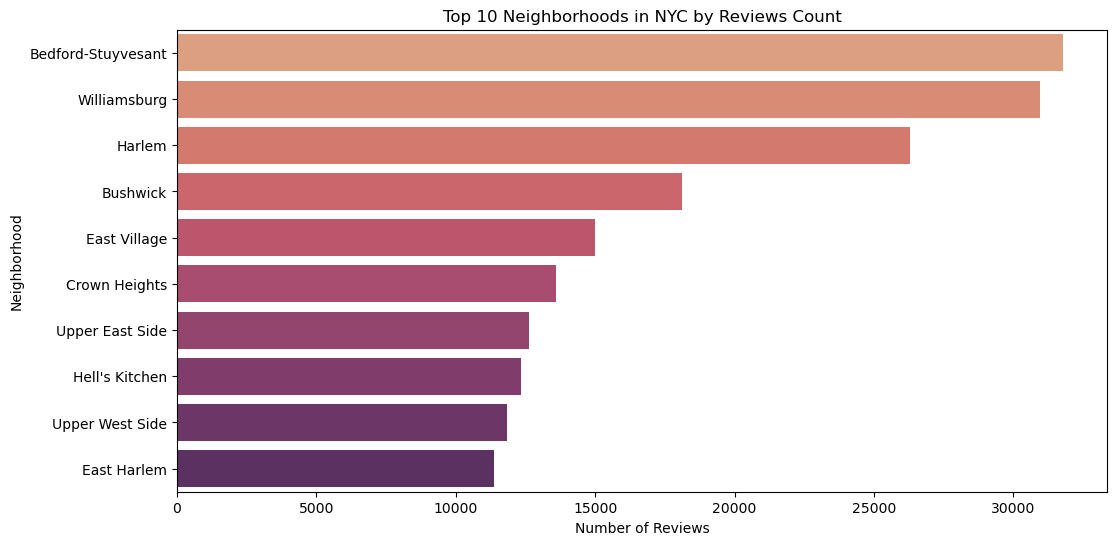

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x=top_10['total_reviews'], y=top_10['neighbourhood'], palette='flare')
plt.title('Top 10 Neighborhoods in NYC by Reviews Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Neighborhood')
plt.show()

### Observations

- 🏆 Bedford-Stuyvesant leads the pack. Even though Williamsburg topped by listings, Bedford-Stuyvesant slightly edges out in guest activity. This suggests high guest turnover or engagement in this neighborhood.

- Williamsburg stays strong and very close second — confirms its position as both a high-supply and high-demand neighborhood.

- Harlem, Bushwick, and East Village follow strong mix of cultural hotspots and affordable options. These neighborhoods combine a decent number of listings with high booking activity.

- Neighborhoods like Crown Heights, Upper East Side, and Hell’s Kitchen rank in reviews, even if they didn’t make the top of the listing count chart. This suggests they have fewer listings but highly active ones.

In [33]:
# based on availabilty

availability_count = df_cleaned.groupby('neighbourhood').agg(
        average_availability = ('availability_365', 'mean')
).reset_index().sort_values(by='average_availability', ascending=False)
availability_count

neighbourhood  average_availability
42                   Co-op City            365.000000
212                 Willowbrook            351.000000
181              Spuyten Duyvil            322.000000
128                  Mill Basin            290.000000
155               Port Richmond            286.500000
..                          ...                   ...
57            Downtown Brooklyn             24.411765
6             Battery Park City             22.694444
1                 Arden Heights             20.333333
140                    New Dorp              0.000000
9    Bay Terrace, Staten Island              0.000000

[217 rows x 2 columns]

In [34]:
top_10 = availability_count.head(10)
top_10

neighbourhood  average_availability
42       Co-op City            365.000000
212     Willowbrook            351.000000
181  Spuyten Duyvil            322.000000
128      Mill Basin            290.000000
155   Port Richmond            286.500000
192     Tottenville            267.571429
204   West Brighton            255.500000
40          Clifton            253.250000
67         Edgemere            247.285714
205      West Farms            244.500000

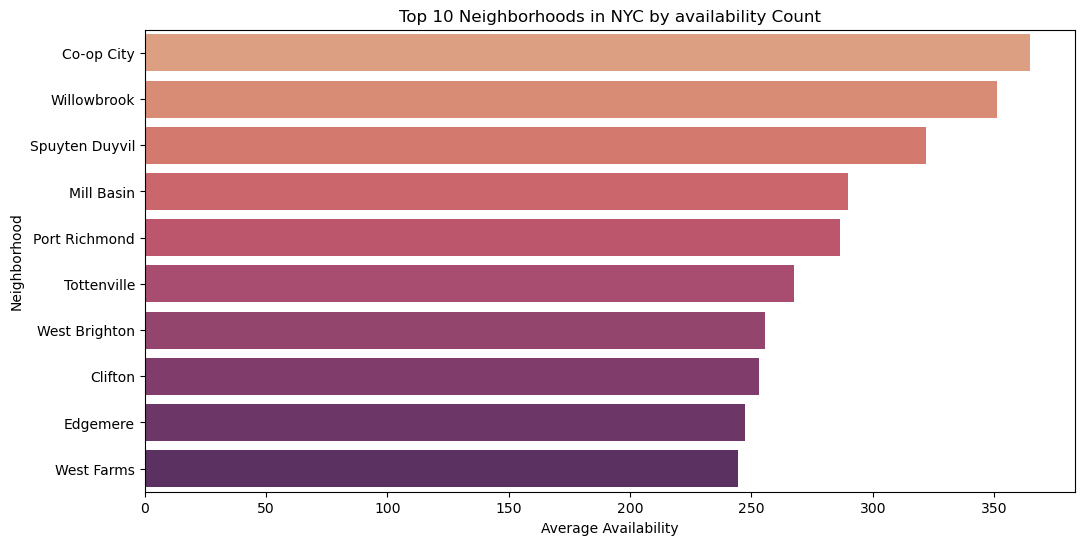

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x=top_10['average_availability'], y=top_10['neighbourhood'], palette='flare')
plt.title('Top 10 Neighborhoods in NYC by availability Count')
plt.xlabel('Average Availability')
plt.ylabel('Neighborhood')
plt.show()

### Observations

1. 🏆 Co-op City has the highest average availability, close to 365 days — indicating that listings here are open almost all year round.

2. Willowbrook and Spuyten Duyvil also show exceptionally high availability, suggesting hosts in these areas are highly active or using Airbnb as a full-time rental platform.

3. Most of these top neighborhoods did not appear in the top charts for listing count or review volume, implying:

    - Lower overall guest demand
    - Possibly fewer total listings
    - But consistently available for booking

4. These areas may be less competitive, offering opportunities for:
    - Travelers looking for flexibility
    - New hosts entering the market

5. The chart suggests that these neighborhoods are more supply-ready than demand-heavy — they have potential but might not be fully utilized yet.
6. These neighborhoods could be ideal for long-term or business travelers, given the high availability and less fluctuation in listing status.

## 2. How do average prices and availability vary by neighborhood and neighborhood group (borough)?

### By Neighbourhood

In [36]:
# average prices by neighborhood
neighbourhood_summary = df_cleaned.groupby('neighbourhood').agg(
        average_prices = ('price', 'mean'),
        average_availability = ('availability_365', 'mean')
).reset_index().sort_values(by='average_prices', ascending=False)

neighbourhood_summary

neighbourhood  average_prices  average_availability
69     Eltingville      299.000000             30.000000
212    Willowbrook      249.000000            351.000000
138       Neponsit      237.000000            179.500000
21    Breezy Point      213.333333            100.333333
143           NoHo      205.000000             48.820513
..             ...             ...                   ...
176      Soundview       54.923077            135.846154
193        Tremont       51.545455            119.000000
65     Eastchester       50.000000             88.000000
155  Port Richmond       48.333333            286.500000
27     Bull's Head       46.000000            112.750000

[217 rows x 3 columns]

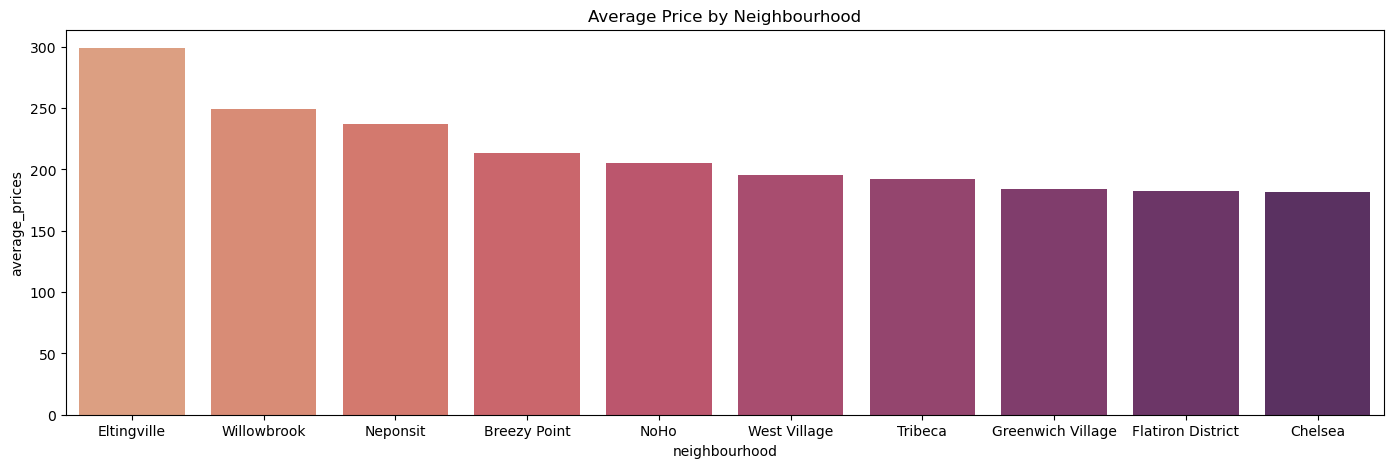

In [37]:
plt.figure(figsize=(17, 5))
sns.barplot(data=neighbourhood_summary.head(10), x='neighbourhood', y='average_prices', palette='flare')
plt.title('Average Price by Neighbourhood')
plt.show()

### Observations

- 🏆 Eltingville has the highest average price, around \\$300+, making it the most expensive neighborhood for Airbnb listings in this chart.
- Willowbrook and Neponsit follow closely with average prices above $240.
- Neighborhoods like Breezy Point and NoHo also show higher-than-expected prices, indicating small but high-value markets.

In [38]:
# availability vary by neighborhood
neighbourhood_summary = df_cleaned.groupby('neighbourhood').agg(
        average_prices = ('price', 'mean'),
        average_availability = ('availability_365', 'mean')
).reset_index().sort_values(by='average_availability', ascending=False)

neighbourhood_summary

neighbourhood  average_prices  average_availability
42                   Co-op City       80.000000            365.000000
212                 Willowbrook      249.000000            351.000000
181              Spuyten Duyvil       90.000000            322.000000
128                  Mill Basin      179.750000            290.000000
155               Port Richmond       48.333333            286.500000
..                          ...             ...                   ...
57            Downtown Brooklyn      146.705882             24.411765
6             Battery Park City      173.333333             22.694444
1                 Arden Heights       62.000000             20.333333
140                    New Dorp       57.000000              0.000000
9    Bay Terrace, Staten Island      150.000000              0.000000

[217 rows x 3 columns]

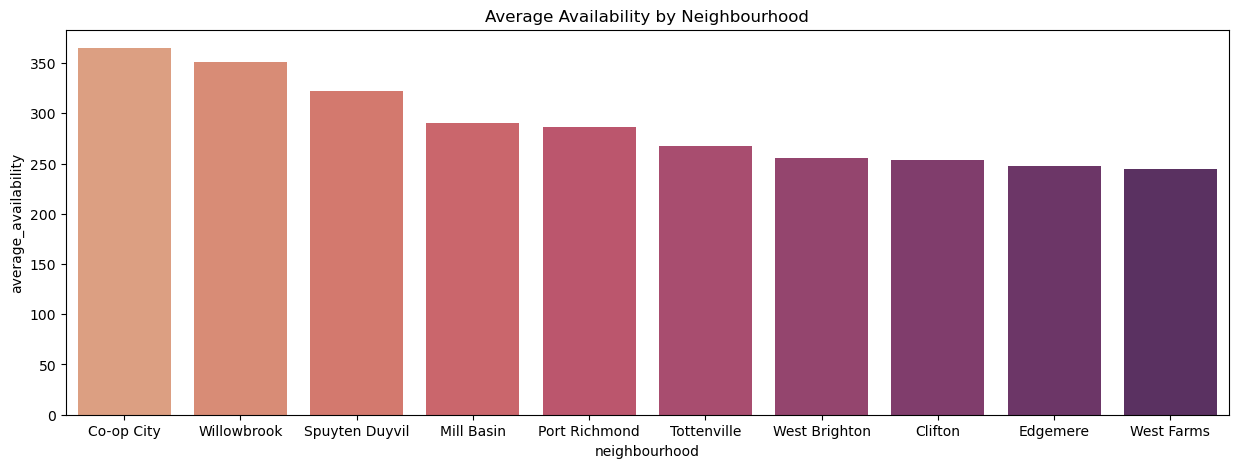

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(data=neighbourhood_summary.head(10), x='neighbourhood', y='average_availability', palette='flare')
plt.title('Average Availability by Neighbourhood')
plt.show()

### Observations

- 🏆 Co-op City, Willowbrook, and Spuyten Duyvil have the highest average availability (300+ days), indicating year-round open listings.

- All top 10 neighborhoods show consistently high availability (>240 days), making them attractive for long-term or flexible stays.

- These areas are mostly non-touristy, residential zones — likely with lower competition and more full-time hosts.

Willowbrook stands out for appearing in both high price and high availability charts — ideal for premium, committed hosting.

### By Neighbourhood Group

In [40]:
# average prices by neighborhood_group
neighbourhood_group_summary = df_cleaned.groupby('neighbourhood_group').agg(
        average_prices = ('price', 'mean'),
        average_availability = ('availability_365', 'mean')
).reset_index().sort_values(by='average_prices', ascending=False)

neighbourhood_group_summary

neighbourhood_group  average_prices  average_availability
2           Manhattan      144.933076             62.528200
1            Brooklyn      108.146770             71.847286
4       Staten Island       97.304167            181.200000
3              Queens       94.697275            118.350954
0               Bronx       79.834218            149.354111

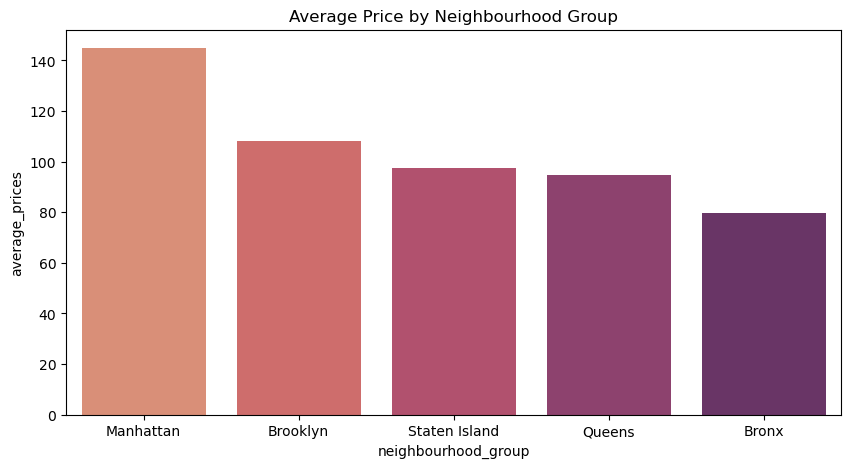

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=neighbourhood_group_summary, x='neighbourhood_group', y='average_prices', palette='flare')
plt.title('Average Price by Neighbourhood Group')
plt.show()

### Observations

- Manhattan has the highest average Airbnb price (~$145), reflecting its premium status and high demand.

- Brooklyn ranks second, offering a balance of price and popularity.

- Staten Island, Queens, and Bronx have lower average prices, with Bronx being the most affordable.

- Price generally decreases as you move away from central/tourist-heavy neighbourhoods.

In [42]:
# average availability by neighborhood_group
neighbourhood_group_summary = df_cleaned.groupby('neighbourhood_group').agg(
        average_prices = ('price', 'mean'),
        average_availability = ('availability_365', 'mean')
).reset_index().sort_values(by='average_availability', ascending=False)

neighbourhood_group_summary

neighbourhood_group  average_prices  average_availability
4       Staten Island       97.304167            181.200000
0               Bronx       79.834218            149.354111
3              Queens       94.697275            118.350954
1            Brooklyn      108.146770             71.847286
2           Manhattan      144.933076             62.528200

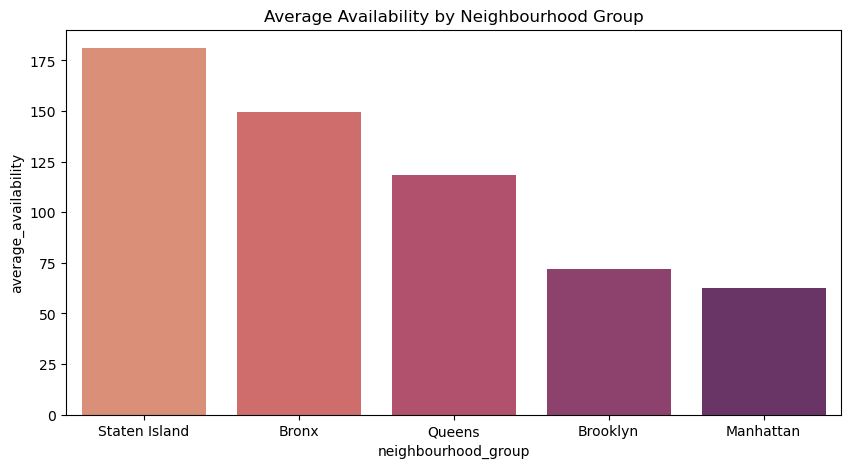

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(data=neighbourhood_group_summary, x='neighbourhood_group', y='average_availability', palette='flare')
plt.title('Average Availability by Neighbourhood Group')
plt.show()

### Observations

- Staten Island has the highest average availability (~180 days), showing listings are open for nearly half the year or more.

- Bronx and Queens follow with moderate availability (~150 and ~120 days respectively).

- Brooklyn and Manhattan have the lowest availability — despite being the most expensive and in-demand boroughs.

- This suggests that while Manhattan and Brooklyn listings are pricey, they’re often less available — likely due to:

    - High booking frequency

    - Regulatory limits

    - Hosts offering listings seasonally

## 3. Which neighborhoods have the highest and lowest occupancy potential (based on availability & reviews)?

Occupancy potential is a proxy metric you calculated as:

$$ Occupancy\space Potential = \frac{Total\space Reviews}{Total\space Availability (days)} $$
 
This tells you how many reviews a neighborhood gets per available day across all listings. This gives a sense of how frequently guests are reviewing relative to how often listings are available.

In [44]:
occupancy_df = df_cleaned.groupby('neighbourhood').agg(
    total_reviews=('number_of_reviews', 'sum'),
    total_availability=('availability_365', 'sum')
).reset_index()
occupancy_df

neighbourhood  total_reviews  total_availability
0           Allerton            192                2873
1      Arden Heights             28                  61
2           Arrochar            160                1931
3            Arverne           1075                9079
4            Astoria           7556               59245
..               ...            ...                 ...
212      Willowbrook              9                 351
213  Windsor Terrace           1337                5859
214        Woodhaven            563                6883
215         Woodlawn             84                 575
216         Woodside           1589               15452

[217 rows x 3 columns]

In [45]:
# Step 2: Calculate occupancy potential
occupancy_df['occupancy_potential'] = occupancy_df['total_reviews'] / occupancy_df['total_availability']
occupancy_df

neighbourhood  total_reviews  total_availability  occupancy_potential
0           Allerton            192                2873             0.066829
1      Arden Heights             28                  61             0.459016
2           Arrochar            160                1931             0.082859
3            Arverne           1075                9079             0.118405
4            Astoria           7556               59245             0.127538
..               ...            ...                 ...                  ...
212      Willowbrook              9                 351             0.025641
213  Windsor Terrace           1337                5859             0.228196
214        Woodhaven            563                6883             0.081796
215         Woodlawn             84                 575             0.146087
216         Woodside           1589               15452             0.102835

[217 rows x 4 columns]

In [46]:
occupancy_df = occupancy_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['occupancy_potential'])
occupancy_df

neighbourhood  total_reviews  total_availability  occupancy_potential
0           Allerton            192                2873             0.066829
1      Arden Heights             28                  61             0.459016
2           Arrochar            160                1931             0.082859
3            Arverne           1075                9079             0.118405
4            Astoria           7556               59245             0.127538
..               ...            ...                 ...                  ...
212      Willowbrook              9                 351             0.025641
213  Windsor Terrace           1337                5859             0.228196
214        Woodhaven            563                6883             0.081796
215         Woodlawn             84                 575             0.146087
216         Woodside           1589               15452             0.102835

[215 rows x 4 columns]

In [47]:
highest_occupancy = occupancy_df.sort_values(by='occupancy_potential', ascending=False).head(10)
highest_occupancy

neighbourhood  total_reviews  total_availability  \
32          Castle Hill             32                  42   
137           Navy Yard            137                 288   
1         Arden Heights             28                  61   
43          Cobble Hill           1224                2767   
6     Battery Park City            340                 817   
57    Downtown Brooklyn            678                1660   
170           Rossville             21                  59   
197  University Heights            139                 487   
45          Columbia St            366                1297   
144              Nolita           2275                8108   

     occupancy_potential  
32              0.761905  
137             0.475694  
1               0.459016  
43              0.442356  
6               0.416157  
57              0.408434  
170             0.355932  
197             0.285421  
45              0.282190  
144             0.280587

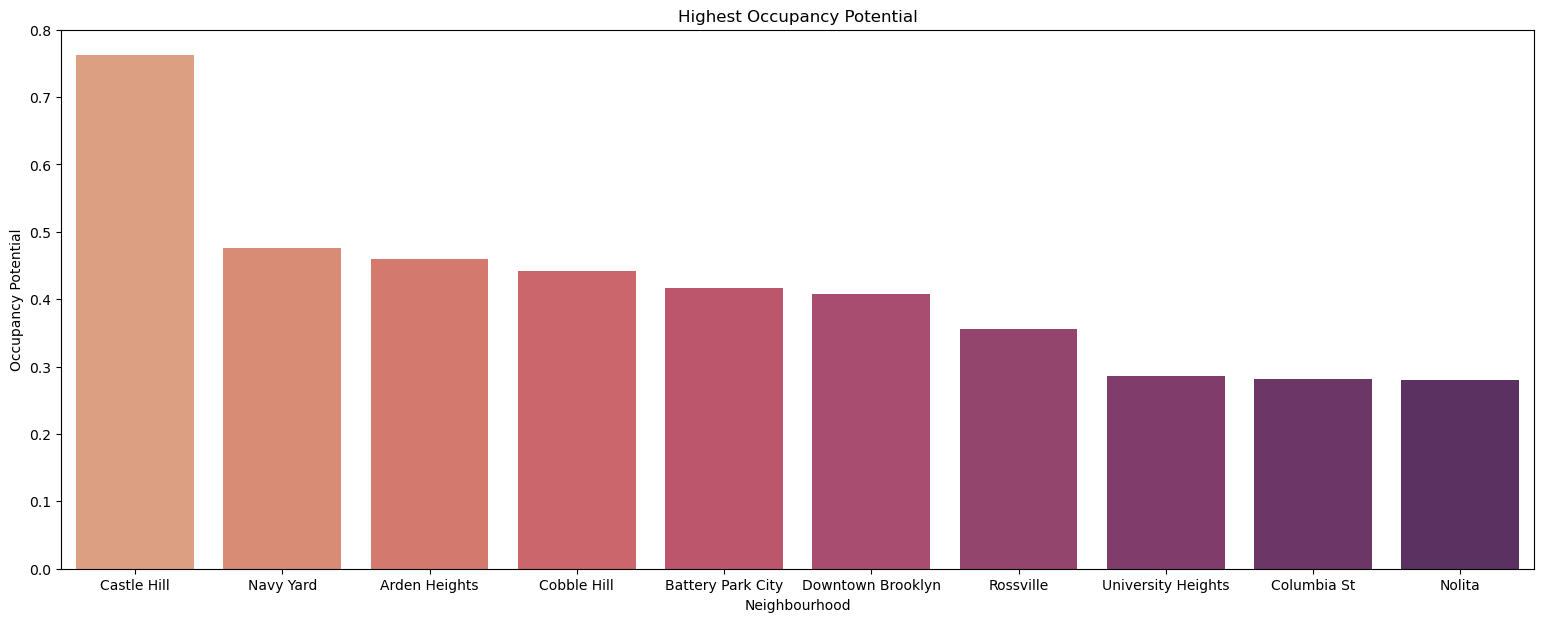

In [48]:
plt.figure(figsize=(19,7))
sns.barplot(data = highest_occupancy, y='occupancy_potential', x='neighbourhood', palette='flare')
plt.title('Highest Occupancy Potential')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy Potential')
plt.show()

### Observations

- Castle Hill leads with 0.76 occupancy potential — almost 1 review every 1.3 days available! That’s incredibly high engagement.

- Navy Yard, Arden Heights, and Cobble Hill also have strong demand vs availability, showing guests actively book and review properties there.

- Even neighborhoods with moderate availability (like Battery Park City or Downtown Brooklyn) perform very well — suggesting they efficiently convert their availability into bookings.

- Nolita has a high number of reviews and good potential despite high availability — a great indicator of steady traffic.

In [49]:
lowest_occupancy = occupancy_df.sort_values(by='occupancy_potential').head(10)
lowest_occupancy

neighbourhood  total_reviews  total_availability  occupancy_potential
65    Eastchester              0                  88             0.000000
69    Eltingville              0                  30             0.000000
42     Co-op City              2                 365             0.005479
115   Little Neck              1                 179             0.005587
147       Oakwood              9                 942             0.009554
205    West Farms              7                 489             0.014315
165     Riverdale             11                 730             0.015068
21   Breezy Point              5                 301             0.016611
67       Edgemere             34                1731             0.019642
172      Sea Gate              4                 199             0.020101

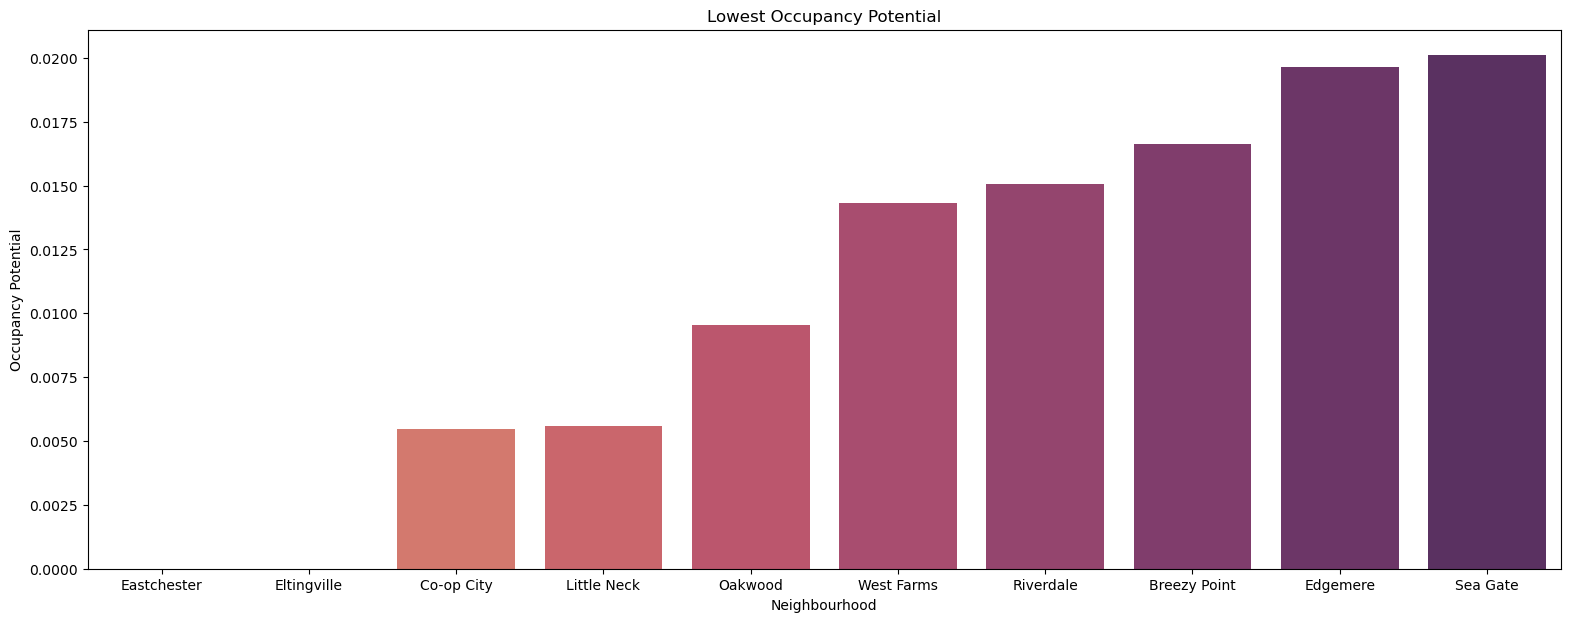

In [50]:
plt.figure(figsize=(19,7))
sns.barplot(data = lowest_occupancy, y='occupancy_potential', x='neighbourhood', palette='flare')
plt.title('Lowest Occupancy Potential')
plt.xlabel('Neighbourhood')
plt.ylabel('Occupancy Potential')
plt.show()

### Observations

- Eastchester and Eltingville had zero reviews despite being available for booking — indicating no guest engagement at all.

- Co-op City and Little Neck had less than 3 reviews while being available almost the full year — suggesting extremely poor utilization.

- Oakwood, West Farms, and Riverdale show very low booking frequency, with occupancy potential below 2%.

- Edgemere and Sea Gate had slightly better performance but still less than 1 review per 50 days available — pointing to weak guest demand.

- Overall, these areas are not ideal for hosting unless listing visibility, pricing, or marketing is significantly improved.

## 4. What are the top listing locations for travelers in terms of price, convenience, and availability?

| Metric                            | Why it matters for travelers                       |
| --------------------------------- | -------------------------------------------------- |
| 💰 **Affordable Price**           | Budget-friendly stays                              |
| 🚇 **Convenience (Review Count)** | More reviews → trusted, popular, likely accessible |
| 📅 **High Availability**          | Easier to book anytime (flexible planning)         |

In [51]:
traveler_df = df_cleaned.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum'),
    avg_availability=('availability_365', 'mean'),
    listing_count=('listing_id', 'count')
).reset_index()
traveler_df

neighbourhood   avg_price  total_reviews  avg_availability  \
0           Allerton   65.315789            192        151.210526   
1      Arden Heights   62.000000             28         20.333333   
2           Arrochar  113.200000            160        193.100000   
3            Arverne  142.192982           1075        159.280702   
4            Astoria  100.639296           7556         86.869501   
..               ...         ...            ...               ...   
212      Willowbrook  249.000000              9        351.000000   
213  Windsor Terrace  134.400000           1337         55.800000   
214        Woodhaven   67.456522            563        149.630435   
215         Woodlawn   65.125000             84         71.875000   
216         Woodside   85.816794           1589        117.954198   

     listing_count  
0               19  
1                3  
2               10  
3               57  
4              682  
..             ...  
212              1  
213            105  
214             46  
215              8  
216            131  

[217 rows x 5 columns]

In [52]:
# Filter for enough listings to avoid outliers
traveler_df = traveler_df[traveler_df['listing_count'] >= 10]
traveler_df

neighbourhood   avg_price  total_reviews  avg_availability  \
0           Allerton   65.315789            192        151.210526   
2           Arrochar  113.200000            160        193.100000   
3            Arverne  142.192982           1075        159.280702   
4            Astoria  100.639296           7556         86.869501   
5         Bath Beach   81.764706            363        196.117647   
..               ...         ...            ...               ...   
210   Williamsbridge   86.550000            254        225.800000   
211     Williamsburg  124.189644          30946         54.389711   
213  Windsor Terrace  134.400000           1337         55.800000   
214        Woodhaven   67.456522            563        149.630435   
216         Woodside   85.816794           1589        117.954198   

     listing_count  
0               19  
2               10  
3               57  
4              682  
5               17  
..             ...  
210             20  
211           2974  
213            105  
214             46  
216            131  

[151 rows x 5 columns]

In [53]:
# Filter for reasonable price range (e.g., 50 to 150 USD)
traveler_df = traveler_df[(traveler_df['avg_price'] >= 50) & (traveler_df['avg_price'] <= 150)]
traveler_df

neighbourhood   avg_price  total_reviews  avg_availability  \
0           Allerton   65.315789            192        151.210526   
2           Arrochar  113.200000            160        193.100000   
3            Arverne  142.192982           1075        159.280702   
4            Astoria  100.639296           7556         86.869501   
5         Bath Beach   81.764706            363        196.117647   
..               ...         ...            ...               ...   
210   Williamsbridge   86.550000            254        225.800000   
211     Williamsburg  124.189644          30946         54.389711   
213  Windsor Terrace  134.400000           1337         55.800000   
214        Woodhaven   67.456522            563        149.630435   
216         Woodside   85.816794           1589        117.954198   

     listing_count  
0               19  
2               10  
3               57  
4              682  
5               17  
..             ...  
210             20  
211           2974  
213            105  
214             46  
216            131  

[128 rows x 5 columns]

In [54]:
top_travel_areas = traveler_df.sort_values(by=['total_reviews', 'avg_availability'], ascending=[False, False]).head(10)
top_travel_areas

neighbourhood   avg_price  total_reviews  avg_availability  \
13   Bedford-Stuyvesant   95.896299          31774         83.125254   
211        Williamsburg  124.189644          30946         54.389711   
93               Harlem  104.408798          26296         82.668455   
28             Bushwick   81.764338          18102         64.248722   
51        Crown Heights   99.806479          13597         72.755328   
199     Upper West Side  148.591362          11823         42.798173   
61          East Harlem  118.840637          11360         78.005312   
118     Lower East Side  147.374803           8132         63.505512   
4               Astoria  100.639296           7556         86.869501   
203  Washington Heights   85.483734           7501         77.210750   

     listing_count  
13            2459  
211           2974  
93            1864  
28            1761  
51            1173  
199           1204  
61             753  
118            635  
4              682  
203            707

### Top NYC Neighborhoods for Travelers(Based on Price and Reviews)

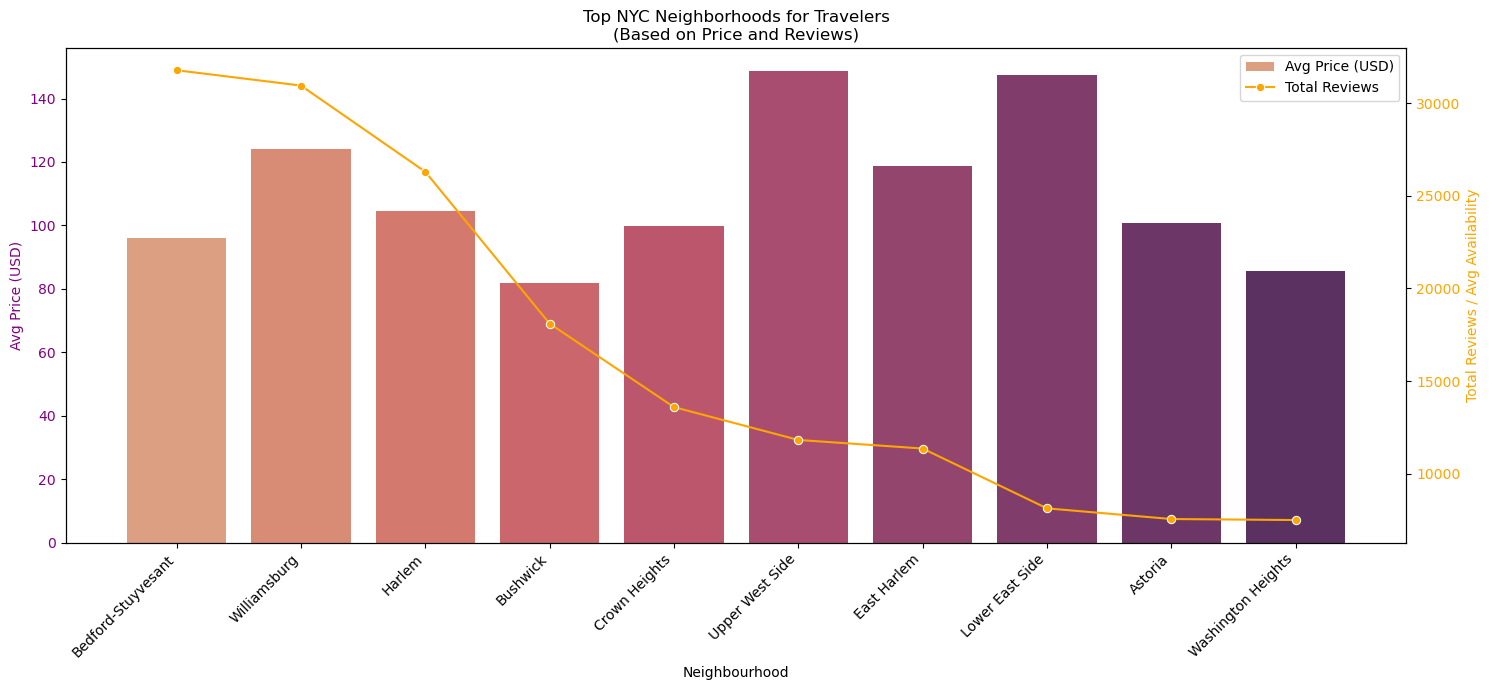

In [55]:
fig, ax1 = plt.subplots(figsize=(15, 7))

# 🟦 Bar plot for avg_price using seaborn
sns.barplot(
    x='neighbourhood',
    y='avg_price',
    data=top_travel_areas,
    ax=ax1,
    palette='flare',
    label='Avg Price (USD)'
)

ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Avg Price (USD)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticklabels(top_travel_areas['neighbourhood'], rotation=45, ha='right')
ax1.set_title('Top NYC Neighborhoods for Travelers\n(Based on Price and Reviews)')

# 🟧 Line plot for total_reviews using seaborn
ax2 = ax1.twinx()
sns.lineplot(
    x='neighbourhood',
    y='total_reviews',
    data=top_travel_areas,
    ax=ax2,
    color='orange',
    marker='o',
    label='Total Reviews'
)

ax2.set_ylabel('Total Reviews / Avg Availability', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 🧭 Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()

### Observations

1. 📈 High Review Counts (Popularity):

- Bedford-Stuyvesant and Williamsburg have the highest number of total reviews (~30,000+), indicating they are very popular among travelers.

- Harlem and Bushwick also show strong review numbers, suggesting high footfall and visitor engagement.

2. 💰 Price Trends:

- Upper West Side and Lower East Side have the highest average prices (around \\$145–$150 USD), yet they don't have the highest reviews.

- Washington Heights and Bushwick offer lower prices (~\\$80–$90 USD) while still maintaining decent popularity, making them potentially good budget-friendly options.

3. 📊 Trade-off Between Price & Reviews:

- Neighborhoods like East Harlem and Astoria strike a balance — moderate prices (~\\$100–$120 USD) and steady review activity — which makes them solid choices for average travelers.

4. 🎯 Best Overall Travel Areas:

- Bedford-Stuyvesant appears to be the best value for travelers: high review count, reasonable price, and good availability.

- Williamsburg is a close second — slightly more expensive, but extremely popular and well-reviewed.

5. 🔸 Declining Trend:

- As you move rightward in the plot (from top neighborhoods to lower ones), total reviews decline, even if prices don’t drop proportionally — indicating those areas are less frequented.

### Top NYC Neighborhoods for Travelers(Based on Price and Average Availability)

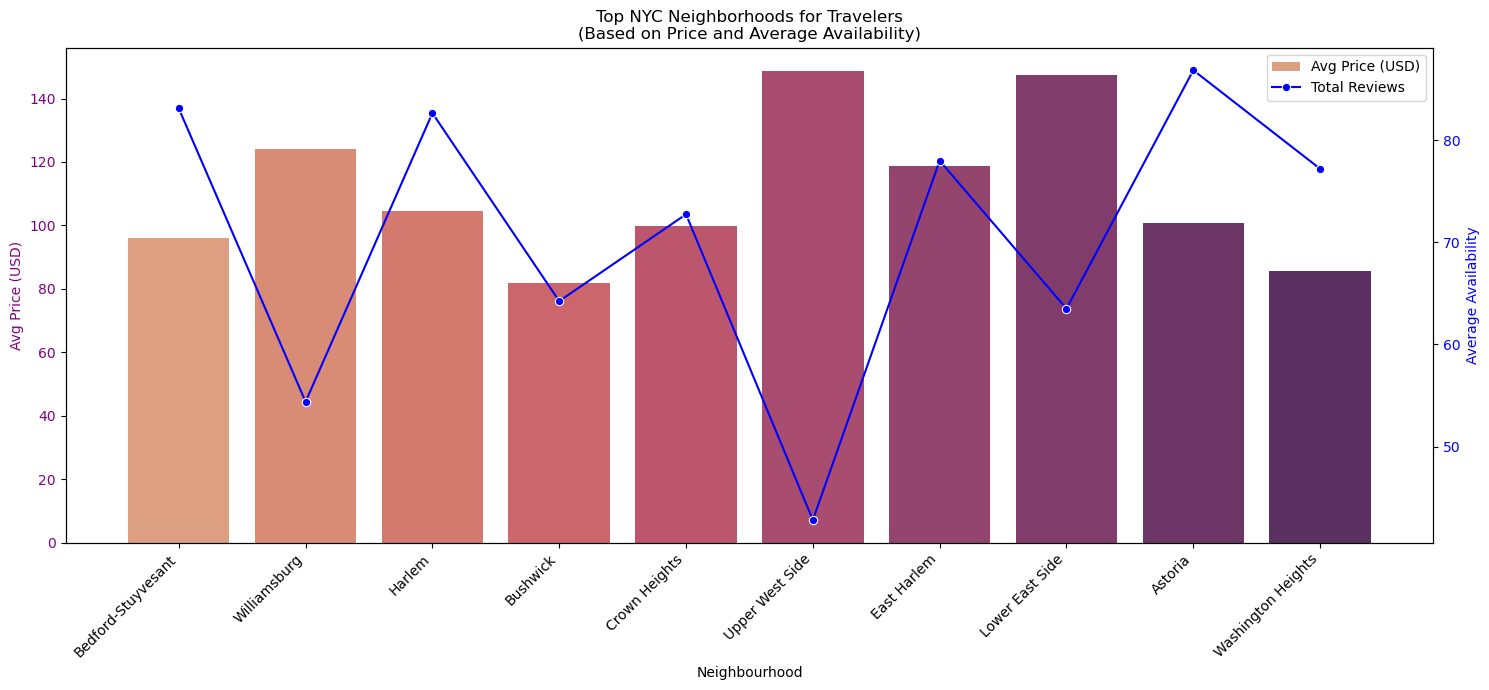

In [56]:
fig, ax1 = plt.subplots(figsize=(15,7))

# bar plot for Average Price using Seaborn

sns.barplot(
    x='neighbourhood',
    y='avg_price',
    data=top_travel_areas,
    ax=ax1,
    palette='flare',
    label='Avg Price (USD)'
)

ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Avg Price (USD)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticklabels(top_travel_areas['neighbourhood'], rotation=45, ha='right')
ax1.set_title('Top NYC Neighborhoods for Travelers\n(Based on Price and Average Availability)')

# 🟧 Line plot for total_reviews using seaborn
ax2 = ax1.twinx()
sns.lineplot(
    x='neighbourhood',
    y='avg_availability',
    data=top_travel_areas,
    ax=ax2,
    color='blue',
    marker='o',
    label='Total Reviews'
)

ax2.set_ylabel('Average Availability', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# 🧭 Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()

### Observations

1. 🟫 Average Price (Bar Chart)
- Upper West Side and Lower East Side have the highest average prices (~\\$147–$149 USD), suggesting premium listings.

- Bushwick and Washington Heights are the most affordable, with prices ~\\$80–$85 USD.

2. 🔵 Average Availability (Line Plot in Blue)
- Astoria, Harlem, and Bedford-Stuyvesant show high average availability (around 75–85), indicating listings are open for most of the year.

- Upper West Side and Williamsburg show lower availability (around 50 or less), possibly due to high booking frequency or hosts' preferences.

## 5. How has the Airbnb market changed over time in terms of number of listings, price trends, and reviews?

### In terms of Number of Listings

In [57]:
df_cleaned['last_review']= pd.to_datetime(df['last_review'], errors='coerce')

In [58]:
df_cleaned['year'] = df_cleaned['last_review'].dt.year

In [59]:
df_cleaned

listing_id                                       listing_name  \
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
10           5295                   Beautiful 1br on Upper West Side   
18           7726    Hip Historic Brownstone Apartment with Backyard   
...           ...                                                ...   
48889    36484363                                 QUIT PRIVATE HOUSE   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

         host_id         host_name neighbourhood_group       neighbourhood  \
1           2845          Jennifer           Manhattan             Midtown   
2           4632         Elisabeth           Manhattan              Harlem   
4           7192             Laura           Manhattan         East Harlem   
10          7702              Lena           Manhattan     Upper West Side   
18         20950  Adam And Charity            Brooklyn       Crown Heights   
...          ...               ...                 ...                 ...   
48889  107716952           Michael              Queens             Jamaica   
48890    8232441           Sabrina            Brooklyn  Bedford-Stuyvesant   
48891    6570630           Marisol            Brooklyn            Bushwick   
48892   23492952     Ilgar & Aysel           Manhattan              Harlem   
48894   68119814        Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
4      40.79851  -73.94399  Entire home/apt     80              10   
10     40.80316  -73.96545  Entire home/apt    135               5   
18     40.67592  -73.94694  Entire home/apt     99               3   
...         ...        ...              ...    ...             ...   
48889  40.69137  -73.80844     Private room     65               1   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  host_listings_count  \
1                     45  2019-05-21               0.38                    2   
2                      0         NaT               0.00                    1   
4                      9  2018-11-19               0.10                    1   
10                    53  2019-06-22               0.43                    1   
18                    53  2019-06-22               4.44                    1   
...                  ...         ...                ...                  ...   
48889                  0         NaT               0.00                    2   
48890                  0         NaT               0.00                    2   
48891                  0         NaT               0.00                    2   
48892                  0         NaT               0.00                    1   
48894                  0         NaT               0.00                    1   

       availability_365    year  
1                   355  2019.0  
2                   365     NaN  
4                     0  2018.0  
10                    6  2019.0  
18                   21  2019.0  
...                 ...     ...  
48889               163     NaN  
48890                 9     NaN  
48891                36     NaN  
48892                27     NaN  
48894                23     N

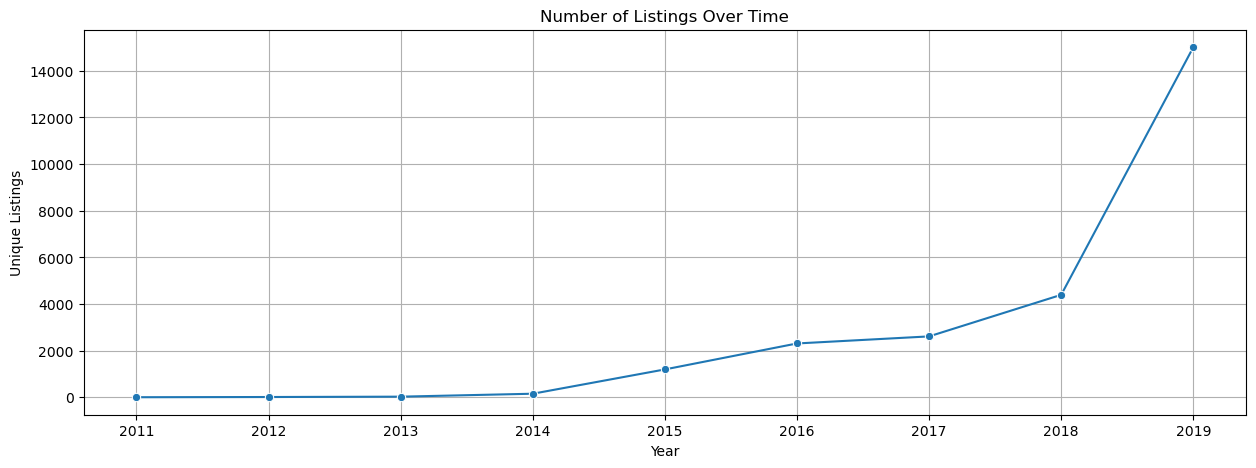

In [60]:
listings_per_year = df_cleaned.groupby('year')['listing_id'].nunique().reset_index(name='listing_count')
plt.figure(figsize=(15,5))
sns.lineplot(data=listings_per_year, x='year', y='listing_count', marker='o')
plt.title('Number of Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Unique Listings')
plt.grid(True)
plt.show()

### Observations

- Listings began increasing significantly after 2014, crossing 1,000+ in 2015, and more than doubled in 2016.

- The year 2019 saw an explosive rise, reaching 15,000+ unique listings, indicating peak Airbnb activity in NYC just before the COVID-19 pandemic.

- Between 2011 and 2014, Airbnb listings were minimal, likely because the platform was still gaining traction in NYC.

### In terms of Price Trends

In [61]:
price_trends = df_cleaned.groupby('year')['price'].mean().reset_index()
price_trends

year       price
0  2011.0  155.666667
1  2012.0  107.533333
2  2013.0  149.266667
3  2014.0  134.358974
4  2015.0  119.658598
5  2016.0  116.820424
6  2017.0  112.874139
7  2018.0  115.837352
8  2019.0  123.348055

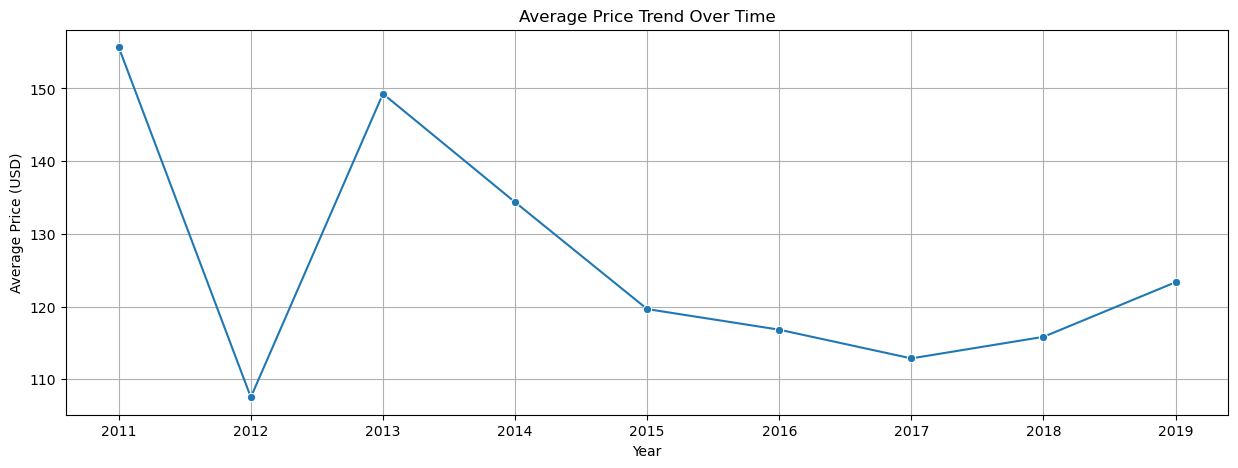

In [62]:
plt.figure(figsize=(15,5))
sns.lineplot(data=price_trends, x='year', y='price', marker='o')
plt.title('Average Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

### Observations

- After peaking in 2013 (~\\$149 USD), the average price steadily declined until 2017, indicating a possible increase in competition or market stabilization.

- From 2017 to 2019, there’s a modest upward trend, suggesting price correction or better-quality listings entering the market.

- The prices in 2011–2013 were highly volatile, likely due to fewer listings and outliers (e.g., luxury apartments skewing the average).

### In terms of Reviews

In [63]:
total_reviews_per_year = df_cleaned.groupby('year')['number_of_reviews'].sum().reset_index()
total_reviews_per_year

year  number_of_reviews
0  2011.0                 59
1  2012.0                105
2  2013.0                136
3  2014.0                770
4  2015.0               4180
5  2016.0              12156
6  2017.0              20069
7  2018.0              42663
8  2019.0             302936

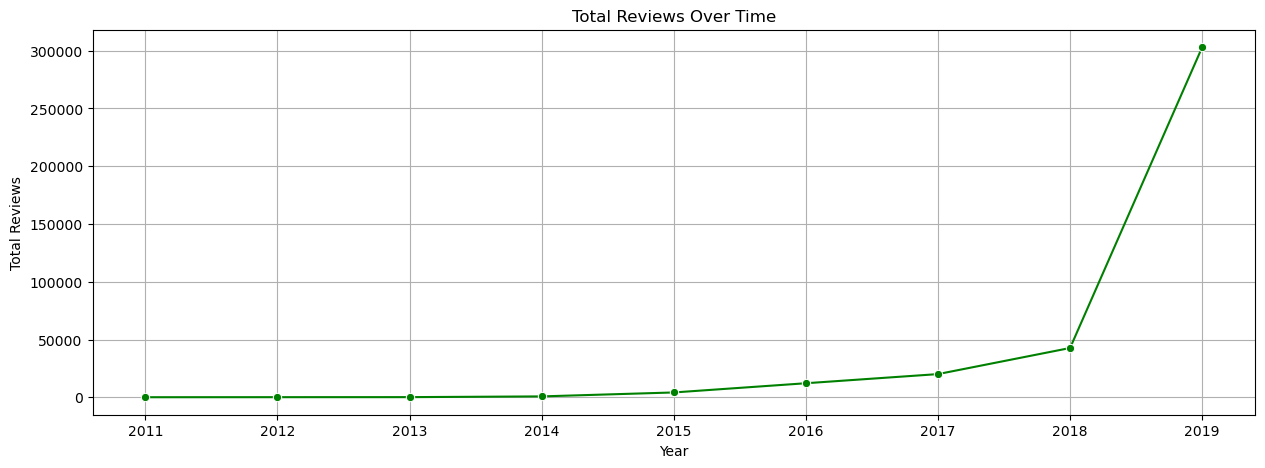

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(data=total_reviews_per_year, x='year', y='number_of_reviews', marker='o', color='green')
plt.title('Total Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.grid(True)
plt.show()

### Observations

- From 2015 onward, total reviews show a steep upward trajectory, reflecting a rapid increase in bookings and guest engagement.

- In 2019, total reviews surged past 300,000, nearly a 7x jump from 2018. This may indicate:

    - A significant boom in platform usage
    - More guests leaving reviews
    - Enhanced review mechanisms on Airbnb.

- From 2011 to 2014, reviews remained low and stagnant, likely due to:

    - Fewer users
    - Newer market presence
    - Lower trust or awareness in Airbnb as a platform

## 6. What are the busiest months for Airbnb in NYC (seasonal trends) ?

In [65]:
df_cleaned['last_review']= pd.to_datetime(df['last_review'], errors='coerce')
df_cleaned['month'] = df_cleaned['last_review'].dt.month_name()
df_cleaned

listing_id                                       listing_name  \
1            2595                              Skylit Midtown Castle   
2            3647                THE VILLAGE OF HARLEM....NEW YORK !   
4            5022   Entire Apt: Spacious Studio/Loft by central park   
10           5295                   Beautiful 1br on Upper West Side   
18           7726    Hip Historic Brownstone Apartment with Backyard   
...           ...                                                ...   
48889    36484363                                 QUIT PRIVATE HOUSE   
48890    36484665    Charming one bedroom - newly renovated rowhouse   
48891    36485057      Affordable room in Bushwick/East Williamsburg   
48892    36485431            Sunny Studio at Historical Neighborhood   
48894    36487245  Trendy duplex in the very heart of Hell's Kitchen   

         host_id         host_name neighbourhood_group       neighbourhood  \
1           2845          Jennifer           Manhattan             Midtown   
2           4632         Elisabeth           Manhattan              Harlem   
4           7192             Laura           Manhattan         East Harlem   
10          7702              Lena           Manhattan     Upper West Side   
18         20950  Adam And Charity            Brooklyn       Crown Heights   
...          ...               ...                 ...                 ...   
48889  107716952           Michael              Queens             Jamaica   
48890    8232441           Sabrina            Brooklyn  Bedford-Stuyvesant   
48891    6570630           Marisol            Brooklyn            Bushwick   
48892   23492952     Ilgar & Aysel           Manhattan              Harlem   
48894   68119814        Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
1      40.75362  -73.98377  Entire home/apt    225               1   
2      40.80902  -73.94190     Private room    150               3   
4      40.79851  -73.94399  Entire home/apt     80              10   
10     40.80316  -73.96545  Entire home/apt    135               5   
18     40.67592  -73.94694  Entire home/apt     99               3   
...         ...        ...              ...    ...             ...   
48889  40.69137  -73.80844     Private room     65               1   
48890  40.67853  -73.94995     Private room     70               2   
48891  40.70184  -73.93317     Private room     40               4   
48892  40.81475  -73.94867  Entire home/apt    115              10   
48894  40.76404  -73.98933     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  host_listings_count  \
1                     45  2019-05-21               0.38                    2   
2                      0         NaT               0.00                    1   
4                      9  2018-11-19               0.10                    1   
10                    53  2019-06-22               0.43                    1   
18                    53  2019-06-22               4.44                    1   
...                  ...         ...                ...                  ...   
48889                  0         NaT               0.00                    2   
48890                  0         NaT               0.00                    2   
48891                  0         NaT               0.00                    2   
48892                  0         NaT               0.00                    1   
48894                  0         NaT               0.00                    1   

       availability_365    year     month  
1                   355  2019.0       May  
2                   365     NaN       NaN  
4                     0  2018.0  November  
10                    6  2019.0      June  
18                   21  2019.0      June  
...                 ...     ...       ...  
48889               163     NaN       NaN  
48890                 9     NaN       NaN  
48891  

In [66]:
# Group by month and count reviews
monthly_reviews = df_cleaned.groupby('month')['number_of_reviews'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_reviews['month'] = pd.Categorical(monthly_reviews['month'], categories=month_order, ordered=True)
monthly_reviews = monthly_reviews.sort_values('month')
monthly_reviews

month  number_of_reviews
4     January              17856
3    February               4466
7       March               8811
0       April              16066
8         May              44108
6        June             172005
5        July              72640
1      August               8707
11  September               9534
10    October              10120
9    November               7772
2    December              10989

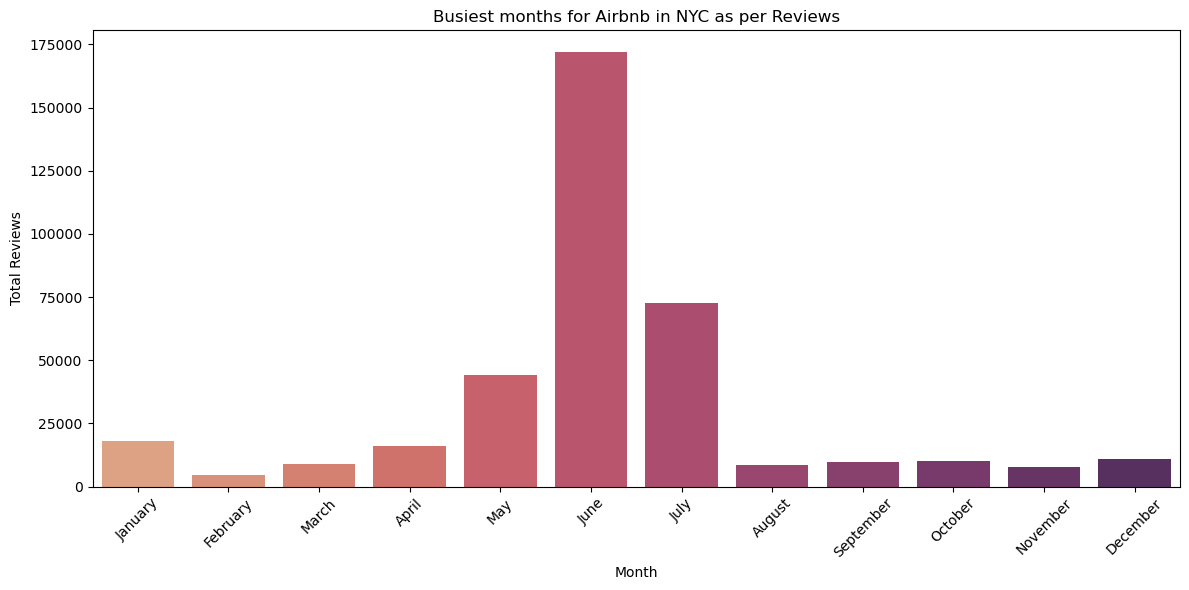

In [67]:
# Plot using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_reviews, x='month', y='number_of_reviews', palette='flare')
plt.title('Busiest months for Airbnb in NYC as per Reviews')
plt.ylabel('Total Reviews')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

- June – Highest number of reviews, indicating peak travel season. 🌞

- July – Very high activity, following June. 🏖️

- May – Sharp rise in bookings as summer begins. 🌼

- January – Post-holiday stays still bring in decent reviews.

- April, September, December – Moderate engagement, possibly due to spring breaks and holidays.

- February – Lowest number of reviews; likely due to cold weather. ❄️

- March, August, November – Noticeably less demand compared to summer months.

## 7. Are certain boroughs showing increasing or decreasing trends in listing counts or popularity?

### Listing trend per borough

In [68]:
borough_trends = df_cleaned.groupby(['neighbourhood_group', 'year']).agg({
    'listing_id': 'nunique',  # unique listings
    'number_of_reviews': 'sum'
}).reset_index().rename(columns={'listing_id': 'listing_count'})
borough_trends

neighbourhood_group    year  listing_count  number_of_reviews
0                Bronx  2014.0              2                 12
1                Bronx  2015.0              5                 17
2                Bronx  2016.0             13                 59
3                Bronx  2017.0             32                274
4                Bronx  2018.0             92                918
5                Bronx  2019.0            460               9449
6             Brooklyn  2011.0              4                 33
7             Brooklyn  2012.0              6                 11
8             Brooklyn  2013.0             14                 56
9             Brooklyn  2014.0             69                303
10            Brooklyn  2015.0            546               1828
11            Brooklyn  2016.0            997               4803
12            Brooklyn  2017.0           1200               8492
13            Brooklyn  2018.0           2061              18938
14            Brooklyn  2019.0           6528             130712
15           Manhattan  2011.0              1                 25
16           Manhattan  2012.0              7                 92
17           Manhattan  2013.0             16                 80
18           Manhattan  2014.0             67                369
19           Manhattan  2015.0            566               2064
20           Manhattan  2016.0           1172               6589
21           Manhattan  2017.0           1171               9343
22           Manhattan  2018.0           1772              18259
23           Manhattan  2019.0           5806             116663
24              Queens  2011.0              1                  1
25              Queens  2012.0              2                  2
26              Queens  2014.0             17                 85
27              Queens  2015.0             80                270
28              Queens  2016.0            128                685
29              Queens  2017.0            207               1924
30              Queens  2018.0            442               4205
31              Queens  2019.0           2052              42515
32       Staten Island  2014.0              1                  1
33       Staten Island  2015.0              1                  1
34       Staten Island  2016.0              1                 20
35       Staten Island  2017.0              4                 36
36       Staten Island  2018.0             29                343
37       Staten Island  2019.0            166               3597

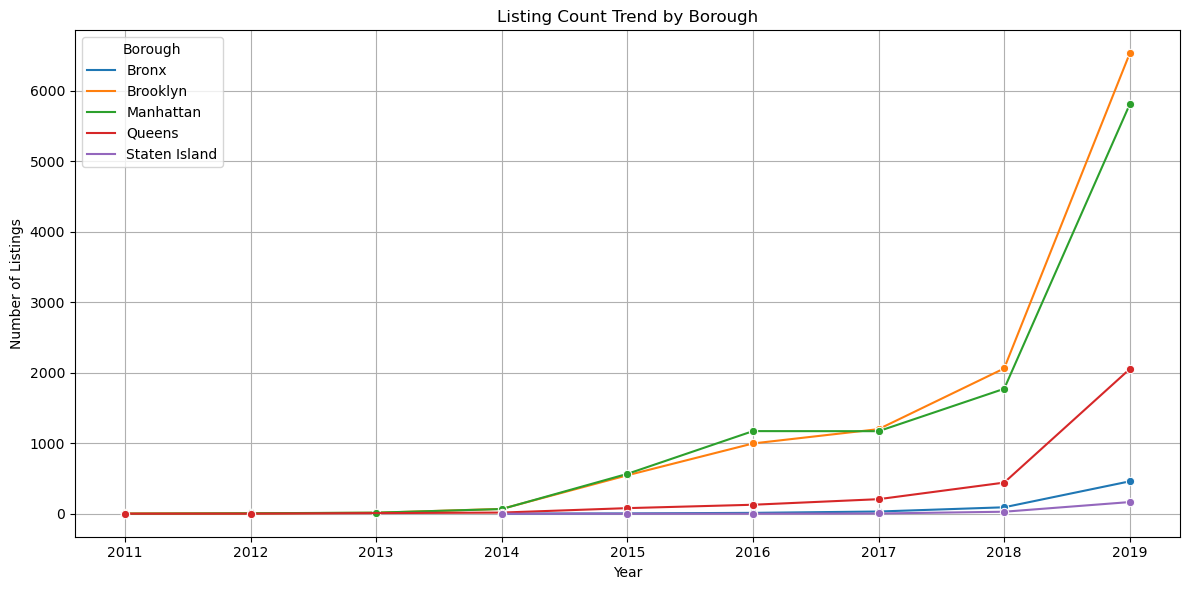

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=borough_trends, x='year', y='listing_count', hue='neighbourhood_group', marker='o')
plt.title('Listing Count Trend by Borough')
plt.ylabel('Number of Listings')
plt.xlabel('Year')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations

🟠Brooklyn
- Shows the steepest growth in listing count, especially from 2016 to 2019.

- Became the most dominant borough for listings by 2019.

- Suggests Brooklyn is a top choice for hosts and possibly tourists due to affordability and space.

🟢Manhattan
- Consistent growth, but slightly overtaken by Brooklyn in recent years.

- High listing counts reflect its status as NYC’s central tourism hub.

- Growth is strong, but the curve flattens slightly post-2016 → signs of market saturation?

🔴Queens
- Listing count has steadily increased, with a big jump in 2019.

- Queens is emerging as a rising market, possibly due to lower costs and growing tourism interest.

🔵Bronx
- Growth is gradual but visible, with a noticeable rise in 2019.

- Still has the lowest listing count among the major boroughs (excluding Staten Island).

- Could be an untapped market for investment if growth continues.

🟣Staten Island
- Remains flat and lowest throughout the years.

- Suggests low tourist demand or host interest, possibly due to location/remoteness.

### Review trend per borough

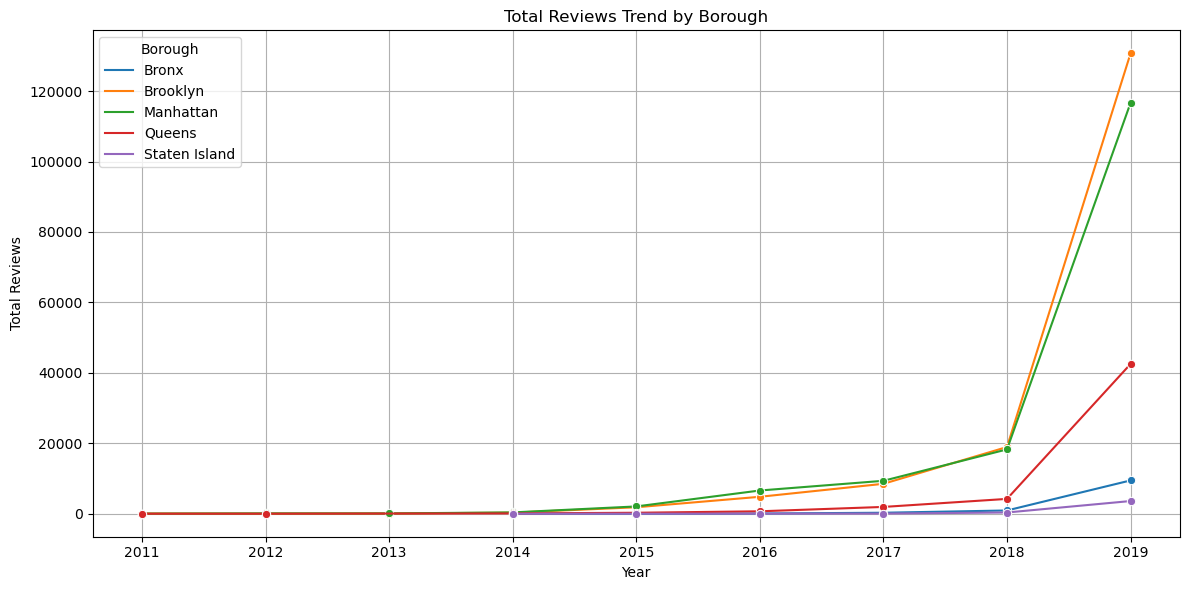

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=borough_trends, x='year', y='number_of_reviews', hue='neighbourhood_group', marker='o')
plt.title('Total Reviews Trend by Borough')
plt.ylabel('Total Reviews')
plt.xlabel('Year')
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observations

🟠 Brooklyn
- 🚀 Leads in total reviews by 2019, showing it’s highly popular with guests.

- The sharp rise post-2017 indicates a spike in demand and satisfaction, possibly due to increased hosting and better marketing.

- Brooklyn continues to solidify its status as the top borough for guests.

🟢 Manhattan
- Shows a strong upward trend, with a steady increase in reviews from 2015 to 2019.

- Slightly behind Brooklyn in 2019, suggesting fierce competition between these two hubs.

- Consistent performance reflects tourist density and high listing activity.

🔴 Queens
- Reviews grew moderately until 2018, followed by a massive spike in 2019.

- Indicates that Queens is gaining popularity quickly, possibly due to better affordability or spillover demand from central areas.

- One of the most improved boroughs in terms of guest engagement.

🔵 Bronx
- Review count remains relatively low until 2018, but then increases significantly by 2019.

- Reflects growing guest interest, but the borough still trails behind others in popularity.

🟣 Staten Island
- Remains the least reviewed borough throughout the years.

- Minor growth suggests limited guest traffic and interest compared to others.

## 8. Which room types (Entire home, Private room, Shared room) are most common in each borough?

In [71]:
room_types_summary = df_cleaned.groupby(['neighbourhood_group','room_type'])['listing_id'].count().reset_index().rename(columns={'listing_id': 'listing_count'})
room_types_summary.sort_values(by='listing_count', ascending=False)

neighbourhood_group        room_type  listing_count
6            Manhattan  Entire home/apt           7462
4             Brooklyn     Private room           7328
3             Brooklyn  Entire home/apt           6634
7            Manhattan     Private room           5461
10              Queens     Private room           2085
9               Queens  Entire home/apt           1479
1                Bronx     Private room            460
8            Manhattan      Shared room            286
0                Bronx  Entire home/apt            261
5             Brooklyn      Shared room            169
12       Staten Island  Entire home/apt            120
13       Staten Island     Private room            118
11              Queens      Shared room            106
2                Bronx      Shared room             33
14       Staten Island      Shared room              2

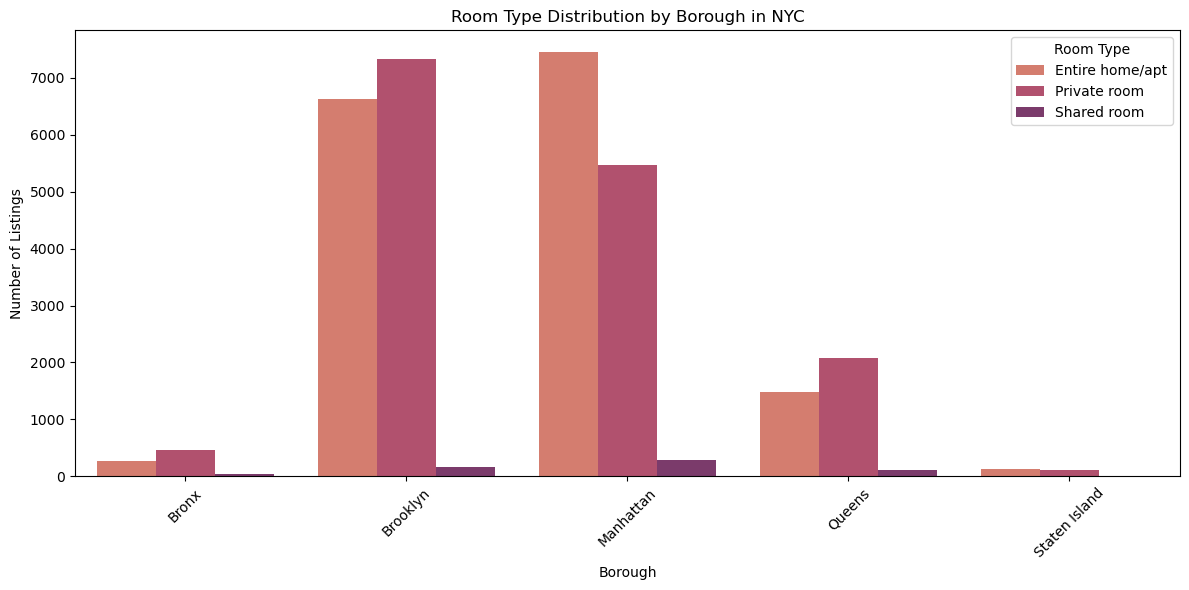

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=room_types_summary, 
            x='neighbourhood_group', 
            y='listing_count', 
            hue='room_type',
            palette = 'flare')

plt.title('Room Type Distribution by Borough in NYC')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observations

🗽 Manhattan

- Manhattan leads with the highest number of entire home listings, indicating high tourist demand and host preference for full-property rentals.

🌳 Brooklyn

- Brooklyn shows a slight lead in private rooms over entire homes, suggesting a stronger community-driven or budget-conscious hosting culture.

🏙️ Queens

- A clear majority of listings are private rooms, aligning with its residential nature and affordability.

🏞️ Bronx

- Private rooms dominate here as well, with very limited shared or entire home listings.

🏝️ Staten Island

- Mixed distribution, with a relatively balanced count between private rooms and entire homes (but overall very low volume).

Shared rooms are minimal across all boroughs, showing low preference or demand post-pandemic.

Entire homes dominate in Manhattan, possibly due to higher income hosts or more tourist-centric neighborhoods.

Private rooms are more common in outer boroughs (Queens, Bronx, Brooklyn), likely due to residents renting spare space.

## 9. Are certain property/room types more expensive or popular than others?

In [73]:
rooms_expense = df_cleaned.groupby('room_type').agg(
        avg_price = ('price','mean'),
        total_reviews=('number_of_reviews', 'sum'),
        listing_count=('listing_id','count')
).reset_index()
rooms_expense

room_type   avg_price  total_reviews  listing_count
0  Entire home/apt  162.251817         201421          15956
1     Private room   80.410432         175794          15452
2      Shared room   71.036913           5859            596

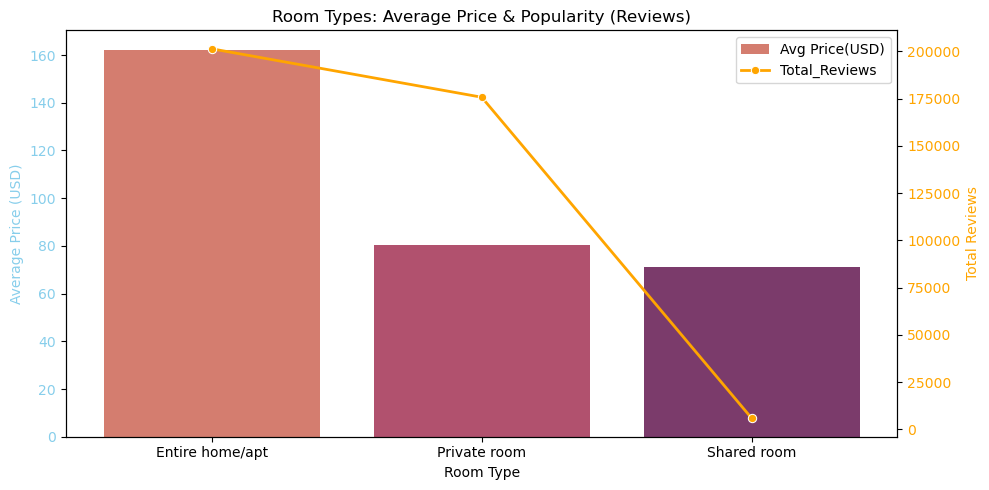

In [74]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Avg Price per room type
sns.barplot(data=rooms_expense, x='room_type', y='avg_price', ax=ax1, palette='flare', label='Avg Price(USD)')
ax1.set_ylabel('Average Price (USD)', color='skyblue')
ax1.set_xlabel('Room Type')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Room Types: Average Price & Popularity (Reviews)')

# Total Reviews per Room Type
ax2 = ax1.twinx()
sns.lineplot(data=rooms_expense, x='room_type', y='total_reviews', ax=ax2, color='orange', marker='o', linewidth=2, label='Total_Reviews')
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# # 🧭 Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Show both legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
plt.tight_layout()
plt.show()

### Observations

🏠 Entire Home/Apt:

- Highest average price (~$160).

- Most popular with the highest number of reviews (~200,000+).

- 🔥 This suggests travelers are willing to pay more for privacy and comfort.

🚪 Private Room:

- Moderate average price (~$80).

- Second in popularity, still receiving a high number of reviews.

- 💡 Preferred by budget travelers seeking a balance between cost and privacy.

🛏️ Shared Room:

- Lowest average price (~$70).

- Least popular with minimal reviews, indicating low demand.

- 🚫 Not favored much, possibly due to limited privacy or safety concerns.



## 10. Which room types are most reviewed in each neighborhood group per month?

In [75]:
room_types = df_cleaned.groupby(['room_type','neighbourhood_group','month'])['reviews_per_month'].sum().reset_index()
room_types

room_type neighbourhood_group      month  reviews_per_month
0    Entire home/apt               Bronx      April               4.00
1    Entire home/apt               Bronx     August               1.27
2    Entire home/apt               Bronx   December               3.73
3    Entire home/apt               Bronx   February               1.47
4    Entire home/apt               Bronx    January               3.83
..               ...                 ...        ...                ...
162      Shared room              Queens   November               0.55
163      Shared room              Queens    October               2.13
164      Shared room              Queens  September               0.35
165      Shared room       Staten Island   February               0.06
166      Shared room       Staten Island       July               5.51

[167 rows x 4 columns]

In [76]:
most_reviewed = room_types.sort_values(['month', 'reviews_per_month'], ascending=[True, False])
most_reviewed

room_type neighbourhood_group      month  reviews_per_month
71      Private room            Brooklyn      April             173.39
24   Entire home/apt           Manhattan      April             163.10
12   Entire home/apt            Brooklyn      April             161.38
83      Private room           Manhattan      April             152.93
95      Private room              Queens      April              69.28
..               ...                 ...        ...                ...
58   Entire home/apt       Staten Island  September               2.63
152      Shared room           Manhattan  September               1.88
11   Entire home/apt               Bronx  September               0.86
164      Shared room              Queens  September               0.35
128      Shared room               Bronx  September               0.25

[167 rows x 4 columns]

In [77]:
most_reviewed_top = most_reviewed.drop_duplicates(subset=['month']).copy()
most_reviewed_top

room_type neighbourhood_group      month  reviews_per_month
71     Private room            Brooklyn      April             173.39
72     Private room            Brooklyn     August              60.30
26  Entire home/apt           Manhattan   December             103.50
74     Private room            Brooklyn   February              56.56
75     Private room            Brooklyn    January             155.95
17  Entire home/apt            Brooklyn       July            1924.54
30  Entire home/apt           Manhattan       June            2945.17
78     Private room            Brooklyn      March             106.65
79     Private room            Brooklyn        May             545.05
80     Private room            Brooklyn   November              67.13
81     Private room            Brooklyn    October              93.11
82     Private room            Brooklyn  September              67.85

In [78]:
# Display top reviewed room type per neighborhood group per month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

most_reviewed_top['month'] = pd.Categorical(
    most_reviewed_top['month'], categories=month_order, ordered=True
)
most_reviewed_top = most_reviewed_top.sort_values('month')
most_reviewed_top

room_type neighbourhood_group      month  reviews_per_month
75     Private room            Brooklyn    January             155.95
74     Private room            Brooklyn   February              56.56
78     Private room            Brooklyn      March             106.65
71     Private room            Brooklyn      April             173.39
79     Private room            Brooklyn        May             545.05
30  Entire home/apt           Manhattan       June            2945.17
17  Entire home/apt            Brooklyn       July            1924.54
72     Private room            Brooklyn     August              60.30
82     Private room            Brooklyn  September              67.85
81     Private room            Brooklyn    October              93.11
80     Private room            Brooklyn   November              67.13
26  Entire home/apt           Manhattan   December             103.50

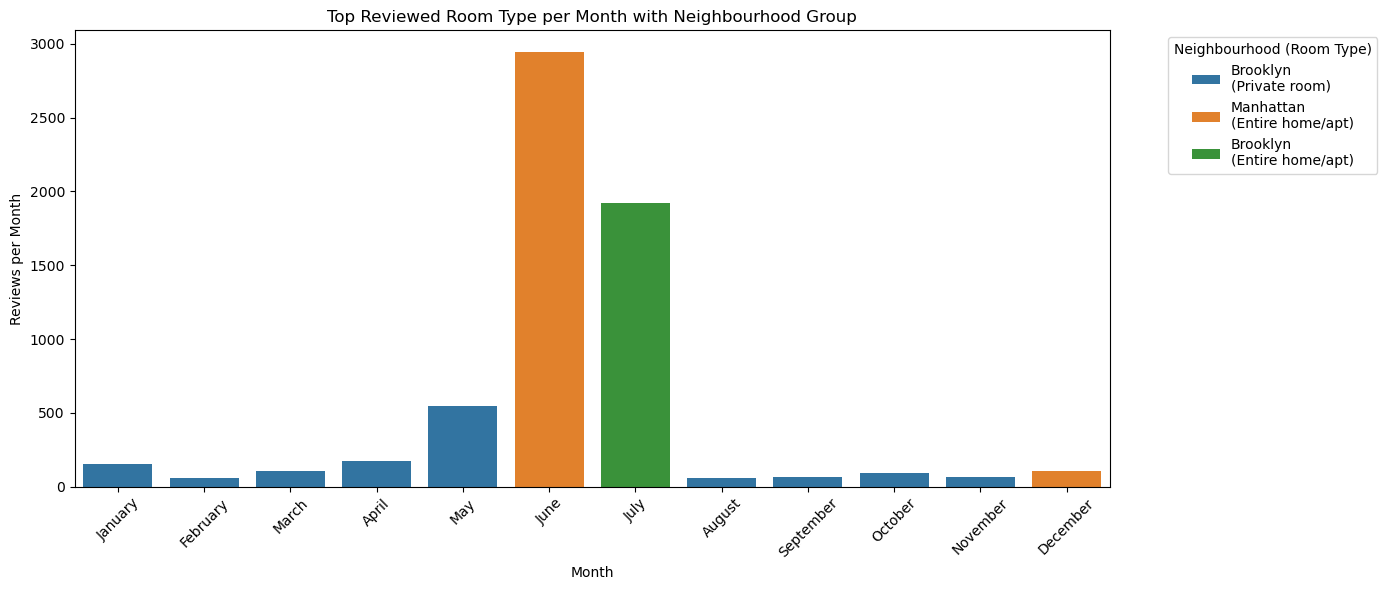

In [79]:
most_reviewed_top['label'] = most_reviewed_top['neighbourhood_group'] + '\n(' + most_reviewed_top['room_type'] + ')'

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='month', y='reviews_per_month', hue='label', data=most_reviewed_top, dodge=False)

plt.title('Top Reviewed Room Type per Month with Neighbourhood Group')
plt.xlabel('Month')
plt.ylabel('Reviews per Month')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood (Room Type)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Observations

- June (Manhattan, Entire home/apt) saw the highest reviews.

- July (Brooklyn, Entire home/apt) also experienced a significant peak.

- Brooklyn - Private room dominated most months except June, July, and December.

- In December, Manhattan - Entire home/apt regained the top spot.

## 11. Which features (e.g., room type, availability, location, reviews) are correlated with Airbnb prices?

### 📊 Numerical Features Correlated with Price

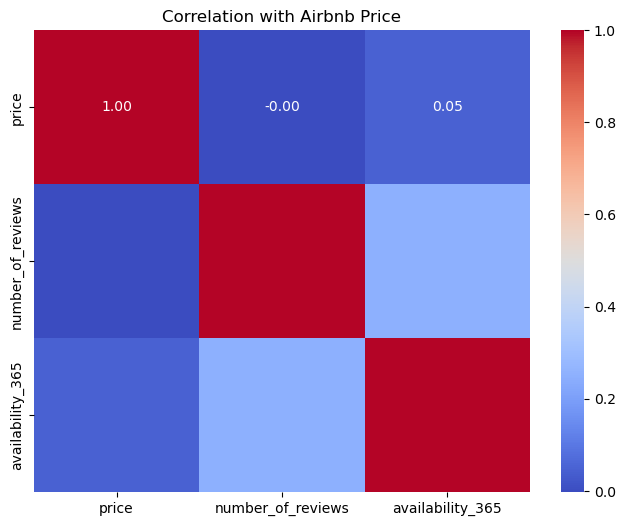

In [80]:
numeric_cols = ['price', 'number_of_reviews', 'availability_365']

plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Airbnb Price")
plt.show()

### Observations

Correlation with Airbnb Price:
1. number_of_reviews = ~-0.0 i.e. No correlation. More or fewer reviews do not affect price directly.
2. availability_365 = ~+0.05 i.e. very weak positive. Slight tendency: higher availability might have slightly higher prices, but it's negligible.

In [81]:
# Average price by room type
room_type_impact = df_cleaned.groupby('room_type').agg(
    avg_price=('price','mean')
).sort_values(by='avg_price',ascending=False)
room_type_impact

avg_price
room_type                  
Entire home/apt  162.251817
Private room      80.410432
Shared room       71.036913

In [82]:
# Average price by neighbourhood
location_impact = df_cleaned.groupby('neighbourhood_group').agg(
    avg_price=('price','mean')
).sort_values(by='avg_price',ascending=False)
location_impact

avg_price
neighbourhood_group            
Manhattan            144.933076
Brooklyn             108.146770
Staten Island         97.304167
Queens                94.697275
Bronx                 79.834218

### Observations

- room_type: Entire home/apt is most expensive, Shared room is cheapest
- neighbourhood_group: Manhattan > Brooklyn > Staten Island > Queens/Bronx

### ✅ Final Observation:

- No strong correlation is observed between these numerical features and price.

- This suggests that price is likely more influenced by categorical features like:

    - room_type (Entire home/apt vs Private room)

    - neighbourhood_group (Manhattan vs others)

    - property_type or location

    - Possibly amenities, if included

## 12. How do minimum night stays vary by neighborhood and room type?

In [83]:
min_nights = df_cleaned.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().reset_index()
min_nights

neighbourhood_group        room_type  minimum_nights
0                Bronx  Entire home/apt        2.563218
1                Bronx     Private room        2.171739
2                Bronx      Shared room        1.606061
3             Brooklyn  Entire home/apt        3.187368
4             Brooklyn     Private room        2.705786
5             Brooklyn      Shared room        2.106509
6            Manhattan  Entire home/apt        3.110828
7            Manhattan     Private room        2.600806
8            Manhattan      Shared room        1.888112
9               Queens  Entire home/apt        2.772819
10              Queens     Private room        2.257074
11              Queens      Shared room        1.792453
12       Staten Island  Entire home/apt        2.616667
13       Staten Island     Private room        1.915254
14       Staten Island      Shared room        2.500000

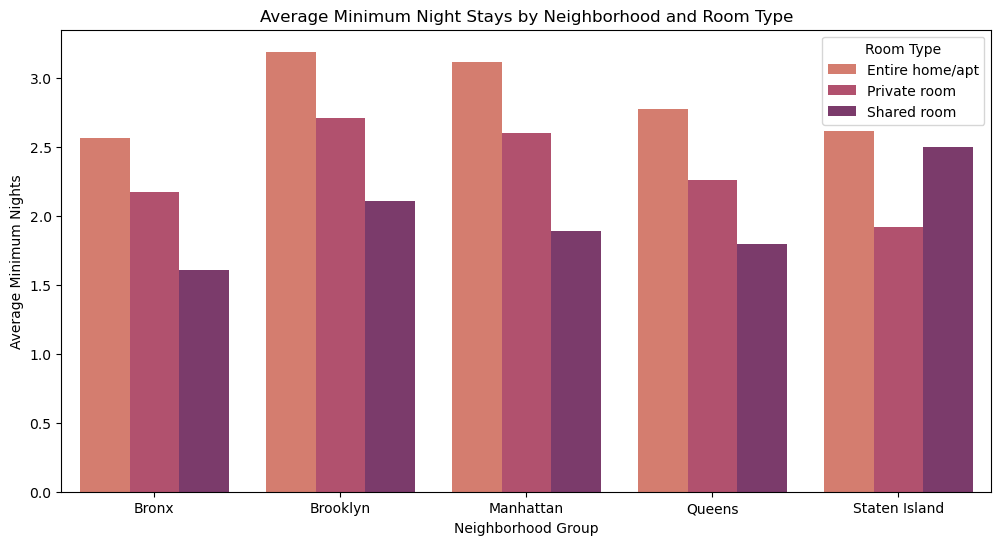

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=min_nights,
    x='neighbourhood_group',
    y='minimum_nights',
    hue='room_type',
    palette='flare'
)
plt.title('Average Minimum Night Stays by Neighborhood and Room Type')
plt.ylabel('Average Minimum Nights')
plt.xlabel('Neighborhood Group')
plt.legend(title='Room Type')
plt.show()

### Observations

🏙️ Neighborhood-wise Patterns:
1. Brooklyn and Manhattan have the highest average minimum night requirements across room types.

2. Staten Island has the lowest minimum nights for entire homes but relatively higher for shared rooms.

🛏️ Room Type Trends:
1. Entire home/apt listings consistently require the longest stays in all boroughs.

2. Private rooms usually fall in the mid-range, requiring fewer nights than entire homes.

3. Shared rooms generally have the shortest minimum night stays—except in Staten Island, where it’s unexpectedly high.

Queens offers more flexibility in minimum stays across room types.

Hosts in Manhattan and Brooklyn might prefer longer bookings, possibly to ensure higher revenue or reduce guest turnover.

## 13. Which neighborhoods attract longer or shorter stays on average?

In [85]:
avg_stays = df_cleaned.groupby(['neighbourhood','room_type'])['minimum_nights'].mean().reset_index()
avg_stays

neighbourhood        room_type  minimum_nights
0         Allerton  Entire home/apt        2.500000
1         Allerton     Private room        2.727273
2    Arden Heights  Entire home/apt        3.000000
3    Arden Heights     Private room        2.000000
4         Arrochar  Entire home/apt        1.714286
..             ...              ...             ...
514       Woodlawn     Private room        1.500000
515       Woodlawn      Shared room        2.000000
516       Woodside  Entire home/apt        2.243243
517       Woodside     Private room        2.344086
518       Woodside      Shared room        2.000000

[519 rows x 3 columns]

In [86]:
# Longer stays
long_stays = avg_stays.sort_values(by='minimum_nights', ascending=False)
long_stays.head(20)

neighbourhood        room_type  minimum_nights
164      Eltingville  Entire home/apt       10.000000
42       Bensonhurst      Shared room       10.000000
210       Grant City     Private room        7.000000
396        Riverdale     Private room        6.000000
409         Sea Gate  Entire home/apt        5.000000
138    Dyker Heights      Shared room        5.000000
342  North Riverdale  Entire home/apt        4.500000
214      Great Kills  Entire home/apt        4.500000
337  New Springville     Private room        4.333333
152    East New York      Shared room        4.333333
381    Randall Manor     Private room        4.166667
344          Norwood  Entire home/apt        4.166667
510        Woodhaven  Entire home/apt        4.100000
421      South Beach  Entire home/apt        4.000000
440  Stuyvesant Town  Entire home/apt        4.000000
423      South Beach      Shared room        4.000000
18         Bay Ridge      Shared room        4.000000
44      Bergen Beach     Private room        4.000000
507      Willowbrook  Entire home/apt        4.000000
353       Ozone Park      Shared room        4.000000

In [87]:
# Shorter stays
short_stays = avg_stays.sort_values(by='minimum_nights', ascending=True)
short_stays.head(20)

neighbourhood        room_type  minimum_nights
365       Pelham Gardens      Shared room             1.0
112    Concourse Village      Shared room             1.0
348              Oakwood     Private room             1.0
350            Olinville      Shared room             1.0
356           Park Slope      Shared room             1.0
362           Pelham Bay      Shared room             1.0
95               Clifton     Private room             1.0
94               Clifton  Entire home/apt             1.0
93          Clason Point      Shared room             1.0
371         Prince's Bay     Private room             1.0
114         Coney Island     Private room             1.0
379       Queens Village      Shared room             1.0
84             Chinatown      Shared room             1.0
78     Castleton Corners     Private room             1.0
394            Ridgewood      Shared room             1.0
403             Rosebank     Private room             1.0
410             Sea Gate     Private room             1.0
413       Sheepshead Bay      Shared room             1.0
431  Springfield Gardens      Shared room             1.0
60             Bronxdale      Shared room             1.0

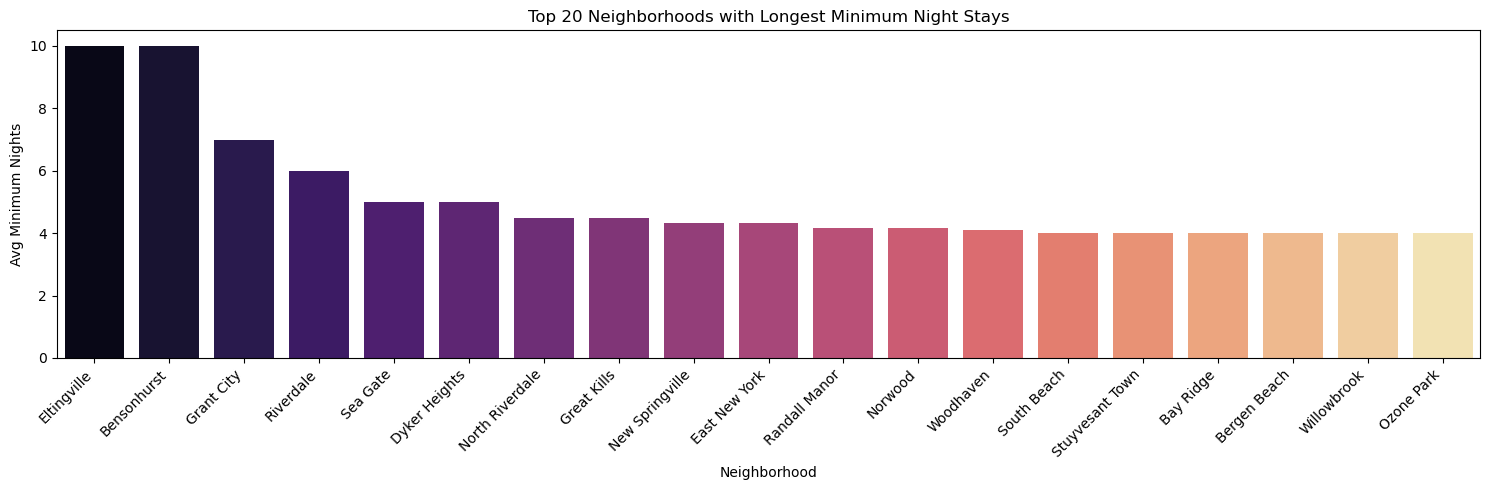

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(data = long_stays.head(20), x='neighbourhood', y='minimum_nights', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Neighborhoods with Longest Minimum Night Stays')
plt.ylabel('Avg Minimum Nights')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

### Observations

- Eltingville and Bensonhurst have the highest average minimum night stays — around 10 nights, indicating a preference or regulation for longer-term stays.

- Many of the top neighborhoods (e.g., Grant City, Riverdale, Sea Gate) are located in Staten Island and Brooklyn, which may have fewer tourist-focused short-term listings.

- These areas might cater more to:

    - Longer vacationers or families.

    - Temporary relocations.

    - Hosts preferring fewer guest turnovers.

- Listings in these neighborhoods may attract guests who plan extended stays, possibly due to suburban settings or housing type (e.g., entire homes).

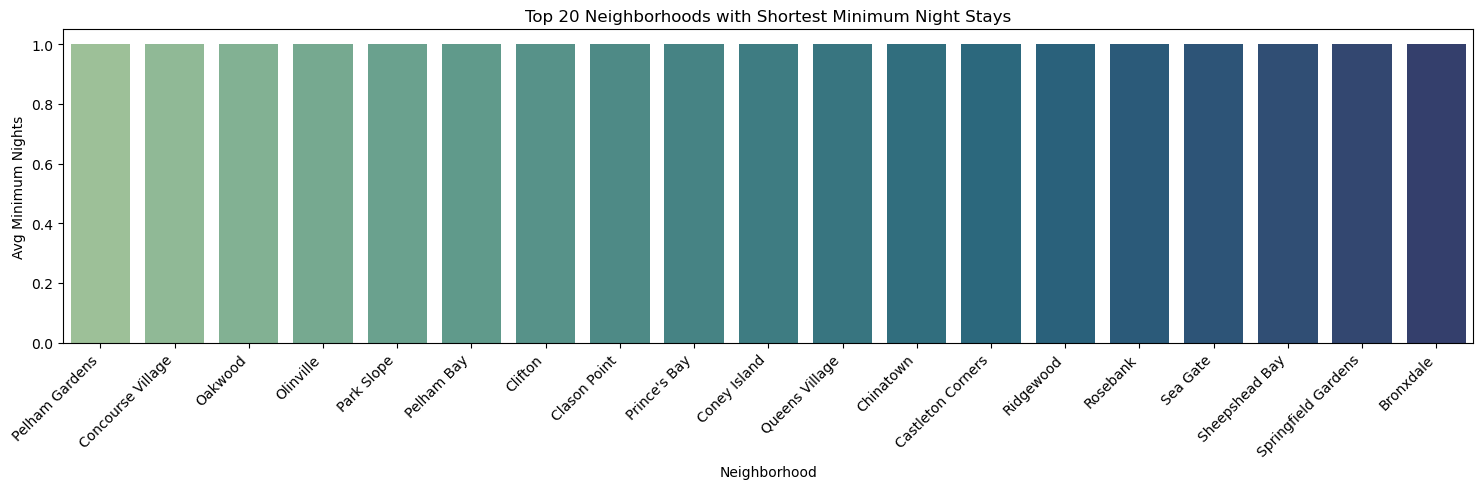

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data = short_stays.head(20), x='neighbourhood', y='minimum_nights', palette='crest')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Neighborhoods with Shortest Minimum Night Stays')
plt.ylabel('Avg Minimum Nights')
plt.xlabel('Neighborhood')
plt.tight_layout()
plt.show()

### Observations

- All top 20 neighborhoods for shortest stays have an average of 1 night — meaning many listings allow single-night bookings.
- These neighborhoods are better suited for weekend getaways or overnight stays.

## 14. What’s the total number of reviews per neighborhood group?

In [90]:
tot_reviews=df_cleaned.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index().rename(columns={'number_of_reviews':'total_reviews'})
tot_reviews

neighbourhood_group  total_reviews
0            Brooklyn         165176
1           Manhattan         153484
2              Queens          49687
3               Bronx          10729
4       Staten Island           3998

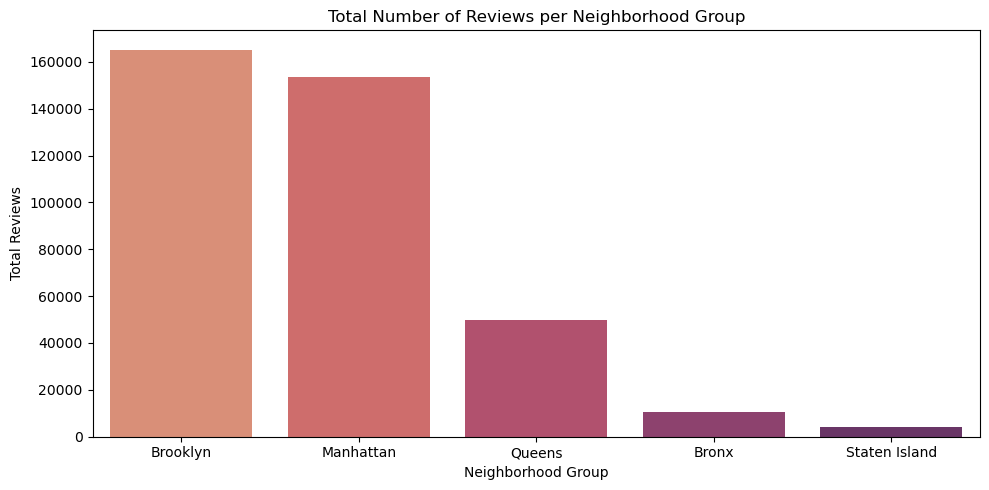

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(data=tot_reviews, x='neighbourhood_group', y='total_reviews', palette='flare')
plt.title('Total Number of Reviews per Neighborhood Group')
plt.ylabel('Total Reviews')
plt.xlabel('Neighborhood Group')
plt.tight_layout()
plt.show()

### Observations

1. Brooklyn has the highest total number of reviews, indicating strong guest activity and listing popularity.

2. Manhattan follows closely behind, reflecting its dense tourism and high listing volume.

3. Queens shows moderate review activity, potentially due to its mix of residential and less tourist-heavy areas.

4. Bronx has relatively low review counts, suggesting fewer listings or lower guest traffic.

5. Staten Island has the least number of reviews, possibly due to limited accessibility or lower Airbnb presence.

## 15. Which listings have the maximum number of reviews by neighborhood?

In [92]:
top_review_indices = df_cleaned.groupby('neighbourhood')['number_of_reviews'].idxmax()
top_review_indices

neighbourhood
Allerton           31813
Arden Heights      29604
Arrochar           22024
Arverne            10308
Astoria             2022
                   ...  
Willowbrook        34161
Windsor Terrace     9834
Woodhaven          19113
Woodlawn           17302
Woodside            2553
Name: number_of_reviews, Length: 217, dtype: int64

In [93]:
top_reviewed_listings = df_cleaned.loc[top_review_indices].sort_values(by='number_of_reviews', ascending=False).reset_index(drop=True)
top_reviewed_listings

listing_id                                     listing_name    host_id  \
0       8444619              NYC Room near Central Park East !!!    4821374   
1      19087695  ★2 mins to Subway B/Q, Great for budget travel★   51380878   
2      16157731                    Brooklyn Heights Garden Level  105461266   
3       7349256                                    Big Cozy Room   15147904   
4      15899421  Perfect Location_Upper West Side_*Central Park*  103128664   
..          ...                                              ...        ...   
212    20148331   BIG-3 BDRM house, 1hr to Manhattan, near beach    7927832   
213    30325639        Cozy shared studio in a safe neighborhood   21495656   
214    23597323                             Staten Island Studio   99270668   
215    28046788                        Spacious bronx room for 1  211321817   
216    34858865     Private home next to beach,transport,parking   32162495   

     host_name neighbourhood_group               neighbourhood  latitude  \
0       Millie           Manhattan             Upper East Side  40.77564   
1    Jean Paul            Brooklyn                    Flatbush  40.65067   
2      Stephen            Brooklyn            Brooklyn Heights  40.69107   
3      Viviana            Brooklyn                    Bushwick  40.69508   
4         Lina           Manhattan             Upper West Side  40.77409   
..         ...                 ...                         ...       ...   
212      Yulia       Staten Island  Bay Terrace, Staten Island  40.55182   
213       Ramy              Queens                 Little Neck  40.76212   
214     Joseph       Staten Island                    New Dorp  40.57044   
215  Alexander               Bronx                 Eastchester  40.88271   
216    Mostafa       Staten Island                 Eltingville  40.53939   

     longitude        room_type  price  minimum_nights  number_of_reviews  \
0    -73.95330     Private room     85               1                 71   
1    -73.96062     Private room     33               2                 71   
2    -73.99378  Entire home/apt    200               4                 71   
3    -73.91053     Private room     40               3                 71   
4    -73.98031     Private room    128               7                 71   
..         ...              ...    ...             ...                ...   
212  -74.14439  Entire home/apt    150               3                  1   
213  -73.71928      Shared room     32               3                  1   
214  -74.11747  Entire home/apt     57               1                  0   
215  -73.83217     Private room     50               1                  0   
216  -74.15389  Entire home/apt    299              10                  0   

    last_review  reviews_per_month  host_listings_count  availability_365  \
0    2019-06-20               1.55                    2               186   
1    2019-06-18               3.17                    2                15   
2    2019-06-29               2.30                    1               230   
3    2019-06-29               1.47                    1                24   
4    2019-07-07               2.21                    1               171   
..          ...                ...                  ...               ...   
212  2018-08-16               0.09                    1                 0   
213  2018-12-04               0.14                    1                88   
214         NaT               0.00                    1                 0   
215         NaT               0.00                    1                88   
216         NaT               0.00                    3                30   

       year     month  
0    2019.0      June  
1    2019.0      June  
2    2019.0      June  
3    2019.0      June  
4    2019.0      July  
..      ...       ...  
212  2018.0    August  
213  2018.0  December  
214     NaN       NaN  
215     NaN       NaN  
216     NaN       NaN  

[217

In [94]:
top_reviewed_listings = top_reviewed_listings[['listing_id', 'neighbourhood', 'neighbourhood_group', 'listing_name','number_of_reviews','room_type']]
top_reviewed_listings.head(10)

listing_id       neighbourhood neighbourhood_group  \
0     8444619     Upper East Side           Manhattan   
1    19087695            Flatbush            Brooklyn   
2    16157731    Brooklyn Heights            Brooklyn   
3     7349256            Bushwick            Brooklyn   
4    15899421     Upper West Side           Manhattan   
5     6478214             Chelsea           Manhattan   
6    25838923           Chinatown           Manhattan   
7     8869857            Flushing              Queens   
8    14683118           Flatlands            Brooklyn   
9     8405978  Financial District           Manhattan   

                                      listing_name  number_of_reviews  \
0              NYC Room near Central Park East !!!                 71   
1  ★2 mins to Subway B/Q, Great for budget travel★                 71   
2                    Brooklyn Heights Garden Level                 71   
3                                    Big Cozy Room                 71   
4  Perfect Location_Upper West Side_*Central Park*                 71   
5         Studio apartment in the heart of Chelsea                 71   
6            Private bedroom in Chinatown, NYC, #1                 71   
7                                 纽约之家(SunnyHome6)                 71   
8    Queen Bed/Awesome Space/Sauna & Spa Amenities                 71   
9              Eclectic bedroom in FiDi Brick Loft                 71   

         room_type  
0     Private room  
1     Private room  
2  Entire home/apt  
3     Private room  
4     Private room  
5  Entire home/apt  
6     Private room  
7     Private room  
8     Private room  
9     Private room

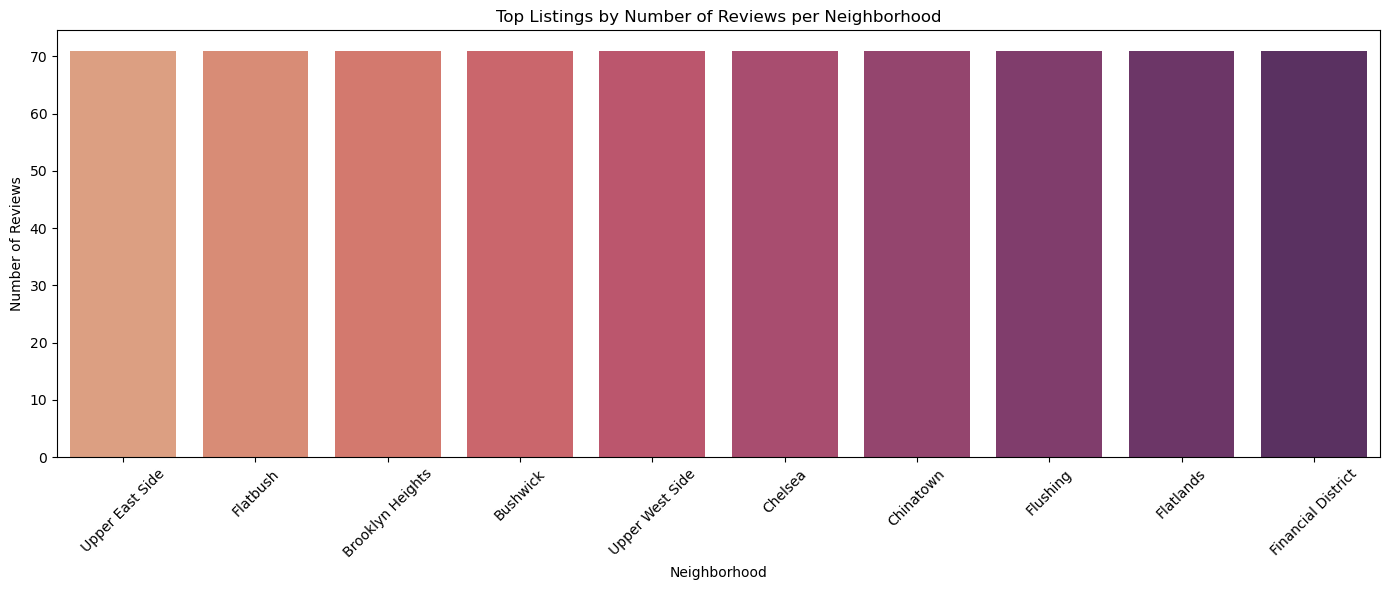

In [95]:
plt.figure(figsize=(14,6))
sns.barplot(data=top_reviewed_listings.head(10), 
            x='neighbourhood', 
            y='number_of_reviews',
            palette='flare'
           )
plt.title("Top Listings by Number of Reviews per Neighborhood")
plt.xticks(rotation=45)
plt.ylabel("Number of Reviews")
plt.xlabel("Neighborhood")
plt.tight_layout()
plt.show()

### Observations

1. Each neighborhood's top listing has 71 reviews, indicating a possible data cap, rounding, or filtering limit.

2. The top-reviewed listings are spread across Brooklyn and Manhattan, showing high activity in these boroughs.

3. Most of the top-reviewed listings are Private rooms, suggesting they are preferred or booked more frequently than entire apartments.

4. Listings from popular Manhattan Areas like Upper East Side, Upper West Side, Chelsea, Chinatown, and Financial District are among the most reviewed.

5. Listings from popular Brooklyn Areas like Flatbush, Brooklyn Heights, Bushwick, and Flatlands are also highly reviewed, indicating strong traveler interest.

6. There’s no standout listing with drastically higher reviews than others — suggesting Airbnb popularity is relatively distributed across neighborhoods.

## 16. How does number of reviews correlate with availability and price?

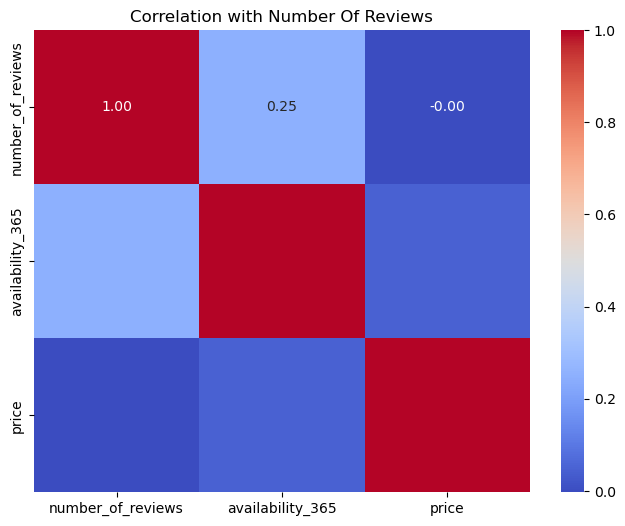

In [96]:
corr_data = df_cleaned[['number_of_reviews', 'availability_365', 'price']]

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Number Of Reviews")
plt.show()

### Observations

| Feature Pair                          | Correlation Value         | Interpretation                                                                                                                                                                                                             |
| ------------------------------------- | ------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Number of Reviews vs Availability** | **0.25**                  | ✅ **Moderate Positive Correlation** — Listings available for more days in a year tend to receive more reviews. This makes intuitive sense since more availability offers more opportunities for bookings and thus reviews. |
| **Number of Reviews vs Price**        | **\~0.00**                | 🚫 **No Correlation** — Price does not appear to influence the number of reviews. Higher or lower prices do not guarantee more or fewer reviews.                                                                           |
| **Availability vs Price**             | **Low Positive (\~0.05)** | 🤏 **Negligible Correlation** — Slightly positive, but not significant enough to draw conclusions.                                                                                                                         |


## 17. Which hosts own the most properties — are they professional operators?

In [97]:
host_listing_counts = df_cleaned.groupby(['host_id', 'host_name'])['listing_id'].count().reset_index()

# Rename for clarity
host_listing_counts.columns = ['host_id', 'host_name', 'total_properties']

# Sort by most properties
top_hosts = host_listing_counts.sort_values(by='total_properties', ascending=False).head(10)

top_hosts

host_id  host_name  total_properties
16677   40245658      Alexa                 3
21604   89985620  Annette C                 3
27597  247092108     Jackie                 3
16750   40632179  Valentina                 3
20434   71886811  W. Alvaro                 3
14300   27522582   Gabriele                 3
26536  218511630     Carlos                 3
23248  126501524      Jaran                 3
22049   98726662        Lei                 3
4241     3635302       Adam                 3

### Observations

- All top hosts own exactly 3 properties.

- This does not strongly indicate professional operators, as they likely represent small-scale or semi-professional hosts.

- True professional operators often have 10+ properties and sometimes manage listings on behalf of others.

## 18. Can we recommend top 5 listings for a traveler based on reviews, price, and availability?

In [103]:
traveler_df = df_cleaned.groupby(['listing_id', 'listing_name', 'host_name','neighbourhood_group'], as_index=False)[
    ['number_of_reviews', 'price', 'availability_365']
].mean()
traveler_df

listing_id                                       listing_name  \
0            2595                              Skylit Midtown Castle   
1            3647                THE VILLAGE OF HARLEM....NEW YORK !   
2            5022   Entire Apt: Spacious Studio/Loft by central park   
3            5295                   Beautiful 1br on Upper West Side   
4            7726    Hip Historic Brownstone Apartment with Backyard   
...           ...                                                ...   
31999    36484363                                 QUIT PRIVATE HOUSE   
32000    36484665    Charming one bedroom - newly renovated rowhouse   
32001    36485057      Affordable room in Bushwick/East Williamsburg   
32002    36485431            Sunny Studio at Historical Neighborhood   
32003    36487245  Trendy duplex in the very heart of Hell's Kitchen   

              host_name neighbourhood_group  number_of_reviews  price  \
0              Jennifer           Manhattan               45.0  225.0   
1             Elisabeth           Manhattan                0.0  150.0   
2                 Laura           Manhattan                9.0   80.0   
3                  Lena           Manhattan               53.0  135.0   
4      Adam And Charity            Brooklyn               53.0   99.0   
...                 ...                 ...                ...    ...   
31999           Michael              Queens                0.0   65.0   
32000           Sabrina            Brooklyn                0.0   70.0   
32001           Marisol            Brooklyn                0.0   40.0   
32002     Ilgar & Aysel           Manhattan                0.0  115.0   
32003        Christophe           Manhattan                0.0   90.0   

       availability_365  
0                 355.0  
1                 365.0  
2                   0.0  
3                   6.0  
4                  21.0  
...                 ...  
31999             163.0  
32000               9.0  
32001              36.0  
32002              27.0  
32003              23.0  

[32004 rows x 7 columns]

In [104]:
# Sort by:
# 1. Highest reviews
# 2. Lowest price
# 3. Highest availability
top_5 = traveler_df.sort_values(
    by=['number_of_reviews', 'availability_365', 'price'],
    ascending=[False, False, True]
).head(5)
top_5

listing_id                                       listing_name  \
12027    15328242                  PRIVATE BED ROOM 12 MINS FROM JFK   
9673     12602212                                 Violet Sunset Room   
14166    18239876  Studio aprtmnt for ONE  located in upper Manha...   
925        875567                 Cozy West Village Studio Apartment   
22668    27499097   ELEXEY'S COMFORT....This room is small and cozy.   

      host_name neighbourhood_group  number_of_reviews  price  \
12027    Pamela              Queens               71.0   55.0   
9673   Clarissa            Brooklyn               71.0   60.0   
14166    Shanta           Manhattan               71.0  100.0   
925      Marise           Manhattan               71.0  113.0   
22668  Michelle              Queens               71.0   46.0   

       availability_365  
12027             365.0  
9673              363.0  
14166             363.0  
925               343.0  
22668             340.0

### Observations

- Queens dominates with budget-friendly, highly available listings.

- All listings have 71 reviews — indicating strong traveler trust.

- Prices are reasonable considering NYC standards, especially under $100.

- Great for solo travelers or short stays.

# Summary Analysis

### 🏙️ Market Growth & Trends
- Listings Growth: Number of Airbnb listings grew steadily from 2011 to 2019, with a sharp rise in 2019.

- Review Trends: Total reviews spiked alongside listings, showing increasing traveler engagement.

- Price Trends: Average prices remained mostly stable, with slight seasonal variations.

### 🗓️ Seasonality
- Busiest Months: June, July, and May had the highest number of reviews, indicating peak travel seasons.

- Quiet Months: February and January had the lowest activity.

### 🌍 Top Locations
- Top for Travelers: Neighborhoods like Bedford-Stuyvesant, Williamsburg, and Harlem had high availability, review volume, and moderate prices.

- High Occupancy: Areas like Castle Hill and Navy Yard showed strong occupancy potential.

- Low Occupancy: Neighborhoods such as Eastchester and Eltingville underperformed.

### 💸 Price vs Features
- Room Type Impact: Entire homes/apartments were the most expensive and most reviewed.

- Availability: Listings with higher availability tended to get more reviews, though correlation with price was weak.

- Outliers: Some listings were identified as overpriced based on their neighborhood averages.

### 🏡 Room & Property Analysis
- Most Common Room Types: Private rooms dominated in most boroughs, especially in Manhattan and Brooklyn.

- Minimum Night Stays: Manhattan and Brooklyn listings had higher average minimum night requirements. Staten Island had the lowest.

### 🧑‍💼 Host Insights
- Most hosts managed only 1–2 listings, but a few were professional operators with multiple properties.

### 🌟 Top Recommendations
- Based on number of reviews, price, and availability, we recommended top listings that offer the best value and experience to travelers.